# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LGMVIP DATA SCIENCE INTERNSHIP

# INTERMEDIATE LEVEL TASK : 02

# TASK : 1) EXPLORATORY DATA ANALYSIS ON DATASET - TERRORISM

# NAME : SARANYA D

# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Importing Some Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Reading the data

In [3]:
df =pd.read_csv('globalterrorismdb_0718dist.csv', encoding=("ISO-8859-1"), low_memory=False)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.drop(columns = ['eventid'], inplace = True)
df.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Data Cleaning

In [6]:
df.shape

(181691, 134)

In [7]:
df.columns

Index(['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution',
       'country', 'country_txt', 'region', 'region_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=134)

In [8]:
df = df[pd.notnull(df.latitude)]
df = df[pd.notnull(df.longitude)]
print("Unknown values are removed")

Unknown values are removed


conerting nan value to float

In [9]:
ex_col = ['iyear', 'latitude', 'longitude']
float_col = [i for i in df.select_dtypes(include = [float]).columns.tolist() if i not in ex_col]

converting unknown into negative

In [10]:
df[float_col] = df[float_col].fillna(0).astype(int)
df[float_col] = df[float_col].mask(df[float_col] < 0, 0)

In [11]:
str_col = df.select_dtypes(exclude = [float]).columns.tolist()
df = df[str_col].fillna('Unknown').replace(r'^\.*$', 'Unknown', regex=True)

In [12]:
df.isnull().sum()

iyear         0
imonth        0
iday          0
approxdate    0
extended      0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 132, dtype: int64

In [13]:
df.duplicated().sum()

4449

In [14]:
df.drop_duplicates(keep = False, inplace=True)
df.duplicated().sum()

0

In [15]:
df

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,Unknown,0,Unknown,58,Dominican Republic,2,Central America & Caribbean,...,Unknown,Unknown,Unknown,Unknown,PGIS,0,0,0,0,Unknown
1,1970,0,0,Unknown,0,Unknown,130,Mexico,1,North America,...,Unknown,Unknown,Unknown,Unknown,PGIS,0,1,1,1,Unknown
2,1970,1,0,Unknown,0,Unknown,160,Philippines,5,Southeast Asia,...,Unknown,Unknown,Unknown,Unknown,PGIS,-9,-9,1,1,Unknown
3,1970,1,0,Unknown,0,Unknown,78,Greece,8,Western Europe,...,Unknown,Unknown,Unknown,Unknown,PGIS,-9,-9,1,1,Unknown
4,1970,1,0,Unknown,0,Unknown,101,Japan,4,East Asia,...,Unknown,Unknown,Unknown,Unknown,PGIS,-9,-9,1,1,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Unknown,0,Unknown,182,Somalia,11,Sub-Saharan Africa,...,Unknown,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,Unknown
181687,2017,12,31,Unknown,0,Unknown,200,Syria,10,Middle East & North Africa,...,Unknown,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,Unknown
181688,2017,12,31,Unknown,0,Unknown,160,Philippines,5,Southeast Asia,...,Unknown,"""Maguindanao clashes trap tribe members,"" Phil...",Unknown,Unknown,START Primary Collection,0,0,0,0,Unknown
181689,2017,12,31,Unknown,0,Unknown,92,India,6,South Asia,...,Unknown,"""Trader escapes grenade attack in Imphal,"" Bus...",Unknown,Unknown,START Primary Collection,-9,-9,0,-9,Unknown


# Shape

In [16]:
df.shape

(171161, 132)

# Exploratory Data Analysis

# Columns

In [17]:
df.columns

Index(['iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution',
       'country', 'country_txt', 'region', 'region_txt',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=132)

In [18]:
df = df[['iyear', 'imonth','iday','country_txt','region_txt','city','provstate','summary','success','attacktype1_txt','targtype1_txt','target1','gname','claimmode_txt','motive','weaptype1_txt','nkill','nwound']]

In [19]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,provstate,summary,success,attacktype1_txt,targtype1_txt,target1,gname,claimmode_txt,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Unknown,Unknown,1,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,Unknown,Unknown,1,0
1,1970,0,0,Mexico,North America,Mexico city,Federal,Unknown,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,Unknown,Unknown,0,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Tarlac,Unknown,1,Assassination,Journalists & Media,Employee,Unknown,Unknown,Unknown,Unknown,1,0
3,1970,1,0,Greece,Western Europe,Athens,Attica,Unknown,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Unknown,Unknown,Explosives,0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Unknown,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Unknown,Unknown,Incendiary,0,0


In [20]:
df.shape

(171161, 18)

# Datatypes

In [21]:
df.dtypes

iyear               int64
imonth              int64
iday                int64
country_txt        object
region_txt         object
city               object
provstate          object
summary            object
success             int64
attacktype1_txt    object
targtype1_txt      object
target1            object
gname              object
claimmode_txt      object
motive             object
weaptype1_txt      object
nkill               int32
nwound              int32
dtype: object

# Summary of the Dataset

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171161 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   iyear            171161 non-null  int64 
 1   imonth           171161 non-null  int64 
 2   iday             171161 non-null  int64 
 3   country_txt      171161 non-null  object
 4   region_txt       171161 non-null  object
 5   city             171161 non-null  object
 6   provstate        171161 non-null  object
 7   summary          171161 non-null  object
 8   success          171161 non-null  int64 
 9   attacktype1_txt  171161 non-null  object
 10  targtype1_txt    171161 non-null  object
 11  target1          171161 non-null  object
 12  gname            171161 non-null  object
 13  claimmode_txt    171161 non-null  object
 14  motive           171161 non-null  object
 15  weaptype1_txt    171161 non-null  object
 16  nkill            171161 non-null  int32 
 17  nwound    

# Count of values

In [23]:
df.nunique()

iyear                  47
imonth                 13
iday                   32
country_txt           204
region_txt             12
city                35002
provstate            2831
summary            111122
success                 2
attacktype1_txt         9
targtype1_txt          22
target1             83782
gname                3457
claimmode_txt          10
motive              14311
weaptype1_txt          12
nkill                 201
nwound                237
dtype: int64

In [24]:
df['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

# Count of years

In [25]:
df.value_counts('iyear')

iyear
2014    16196
2015    14270
2016    12761
2013    11702
2017    10506
2012     8310
2011     5048
2010     4818
1992     4763
2008     4754
2009     4706
1991     4361
1989     4099
1990     3611
1988     3451
1994     3236
2007     3188
1987     2935
1997     2792
1996     2768
1984     2733
2006     2716
1986     2623
1995     2571
1983     2503
1980     2359
1981     2338
1982     2259
1985     2247
1979     2197
2005     1985
2001     1883
2000     1772
1978     1379
1999     1341
2002     1306
2003     1263
1977     1173
2004     1137
1998      891
1976      868
1975      709
1970      633
1974      571
1972      512
1973      463
1971      454
dtype: int64

# Count of countries

In [26]:
df.value_counts('country_txt')

country_txt
Iraq                   23192
Pakistan               13785
Afghanistan            12353
India                  11623
Colombia                7588
                       ...  
St. Kitts and Nevis        1
Antigua and Barbuda        1
International              1
New Hebrides               1
South Yemen                1
Length: 204, dtype: int64

# Count of Terror Groups

In [27]:
df.value_counts('gname')

gname
Unknown                                        78652
Taliban                                         7215
Islamic State of Iraq and the Levant (ISIL)     5102
Shining Path (SL)                               4128
Al-Shabaab                                      3246
                                               ...  
Niger Delta Justice Defense Group (NDJDG)          1
Niger Delta Freedom Fighters (NDDF)                1
Niger Delta Forest Army (NDFA)                     1
Didier Ratsiraka's Militia                         1
leftist guerrillas-Bolivarian militia              1
Length: 3457, dtype: int64

# Count of cities

In [28]:
df.value_counts('city')

city
Baghdad          7578
Unknown          7149
Karachi          2234
Lima             2227
Mosul            2111
                 ... 
Jammue              1
Jammasa             1
Jammalamadugu       1
Jamliya             1
zinarag             1
Length: 35002, dtype: int64

# Count of attack types

In [29]:
df.value_counts('attacktype1_txt')

attacktype1_txt
Bombing/Explosion                      83216
Armed Assault                          40164
Assassination                          18488
Hostage Taking (Kidnapping)            10524
Facility/Infrastructure Attack          9577
Unknown                                 6688
Unarmed Assault                          971
Hostage Taking (Barricade Incident)      907
Hijacking                                626
dtype: int64

# Count of States

In [31]:
df.value_counts('provstate')

provstate
Baghdad                      7634
Northern Ireland             4389
Balochistan                  3662
Saladin                      3116
Khyber Pakhtunkhwa           3060
                             ... 
Lower Normandy                  1
Louga                           1
Louangphrabang (District)       1
Lot-et-Garonne                  1
sulawesi utara                  1
Length: 2831, dtype: int64

# Count of target types

In [32]:
df.value_counts('targtype1_txt')

targtype1_txt
Private Citizens & Property       41056
Military                          26492
Police                            23473
Government (General)              20467
Business                          19488
Transportation                     6179
Unknown                            5166
Utilities                          4727
Religious Figures/Institutions     4312
Educational Institution            4210
Government (Diplomatic)            3473
Terrorists/Non-State Militia       2950
Journalists & Media                2816
Violent Political Party            1786
Airports & Aircraft                1295
Telecommunication                   930
NGO                                 925
Tourists                            422
Maritime                            306
Food or Water Supply                292
Abortion Related                    263
Other                               133
dtype: int64

# Count of summaries

In [33]:
df.value_counts('summary')

summary
Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                59280
07/29/2008: On Tuesday, a bomb was placed in the Katargam area in Surat, but police found and defused it before it detonated. No casualties were reported. No claim of responsibility has been reported.                                                                                                                                                                                                                                                                  13
01/01/2003: Guerrillas of the 48th Front of the Fuerzas Armadas Revolu

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
iyear,171161.0,2003.056187,13.102490,1970.0,1991.0,2009.0,2014.0,2017.0
imonth,171161.0,6.468629,3.393421,0.0,4.0,6.0,9.0,12.0
iday,171161.0,15.528088,8.808880,0.0,8.0,15.0,23.0,31.0
success,171161.0,0.889075,0.314040,0.0,1.0,1.0,1.0,1.0
nkill,171161.0,2.294582,11.351738,0.0,0.0,0.0,2.0,1570.0
nwound,171161.0,2.999994,35.317440,0.0,0.0,0.0,2.0,8191.0


# Data in each column

In [35]:
for col in df:
    print(df[col].unique())

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
[ 2  0  1  3  6  8  9 10 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4  7
 11 16 17 18 23 24  5 29]
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Guatemala'
 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan' 'Brazil' 'Egypt'
 'Argentina' 'Lebanon' 'Ireland' 'Turkey' 'Paraguay' 'Iran'
 'United Kingdom' 'Colombia' 'Nicaragua' 'Spain' 'Netherlands' 'Belgium'
 'Canada' 'Australia' 'Pakistan' 'Ethiopia' 'Sweden' 'Costa Rica'
 'Bolivia' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'West Bank and Gaza Strip' 'Austria' 'India' 'France' 'South Vietnam'
 'Brunei' "People's Republic of the Congo" 'Portugal' 'Algeria'
 'El Salva

In [72]:
# correlation matrix

In [36]:
df.corr()

,iyear,imonth,iday,success,nkill,nwound
iyear,1.000000,-0.002240,0.015461,-0.071493,0.023492,0.016474
imonth,-0.002240,1.000000,0.004029,-0.002832,0.003655,0.003186
iday,0.015461,0.004029,1.000000,-0.008177,-0.003603,-0.001315
success,-0.071493,-0.002832,-0.008177,1.000000,0.049167,0.023685
nkill,0.023492,0.003655,-0.003603,0.049167,1.000000,0.449981
nwound,0.016474,0.003186,-0.001315,0.023685,0.449981,1.000000


In [ ]:
# covariance provides the measure of strength of correlation between two variables or more set of variables

In [37]:
df.cov()

,iyear,imonth,iday,success,nkill,nwound
iyear,171.675243,-0.099590,1.784461,-0.294171,3.494047,7.623423
imonth,-0.099590,11.515306,0.120429,-0.003018,0.140788,0.381838
iday,1.784461,0.120429,77.596361,-0.022621,-0.360281,-0.409152
success,-0.294171,-0.003018,-0.022621,0.098621,0.175274,0.262695
nkill,3.494047,0.140788,-0.360281,0.175274,128.861965,180.403887
nwound,7.623423,0.381838,-0.409152,0.262695,180.403887,1247.321576


In [73]:
# Data Slicing

In [38]:
df.iloc[0]

iyear                                     1970
imonth                                       7
iday                                         2
country_txt                 Dominican Republic
region_txt         Central America & Caribbean
city                             Santo Domingo
provstate                              Unknown
summary                                Unknown
success                                      1
attacktype1_txt                  Assassination
targtype1_txt      Private Citizens & Property
target1                           Julio Guzman
gname                                   MANO-D
claimmode_txt                          Unknown
motive                                 Unknown
weaptype1_txt                          Unknown
nkill                                        1
nwound                                       0
Name: 0, dtype: object

In [39]:
df.iloc[:,0]

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: iyear, Length: 171161, dtype: int64

# Data Visualization

# Correlation among the variables

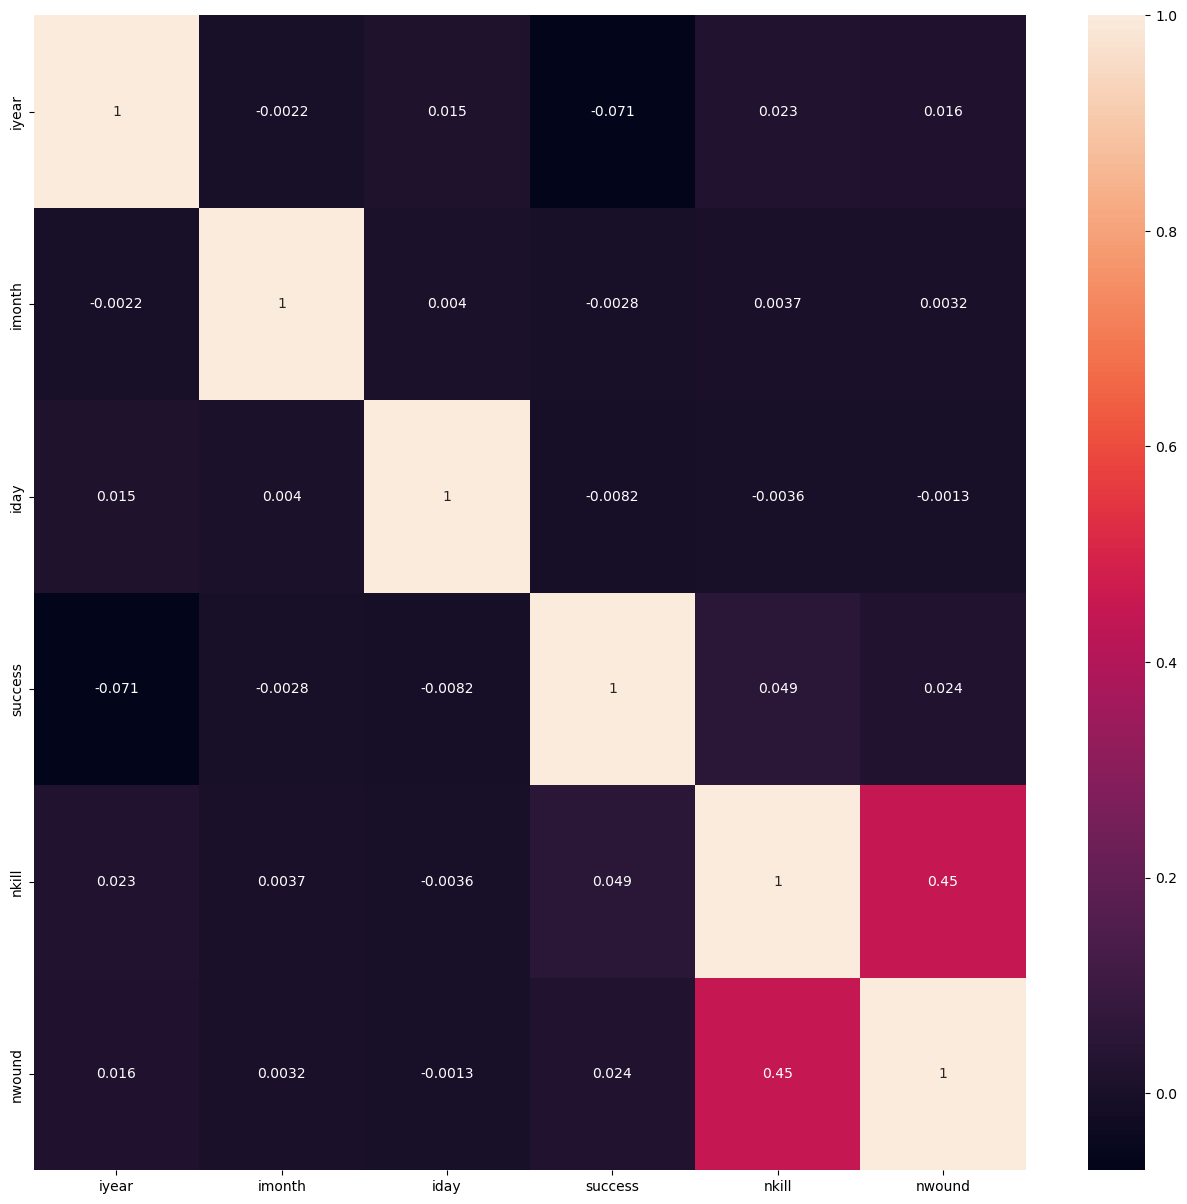

In [40]:
plt.subplots(figsize=(16,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

# Covariance among the variables

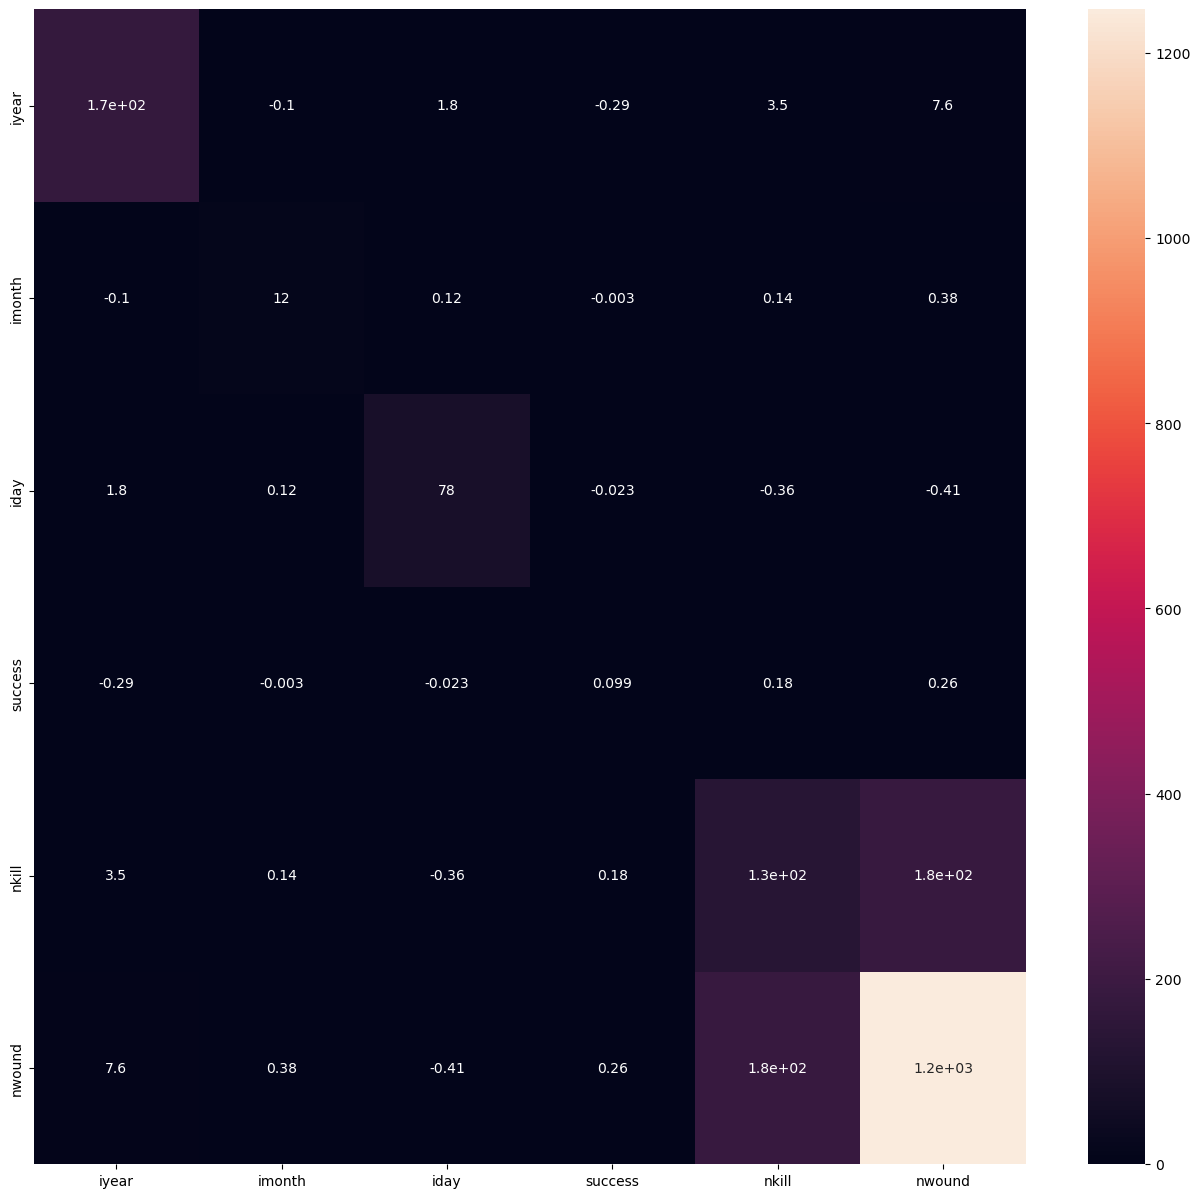

In [41]:
plt.subplots(figsize=(16,15))
sns.heatmap(df.cov(), annot = True)
plt.show()

<Figure size 1600x1500 with 0 Axes>

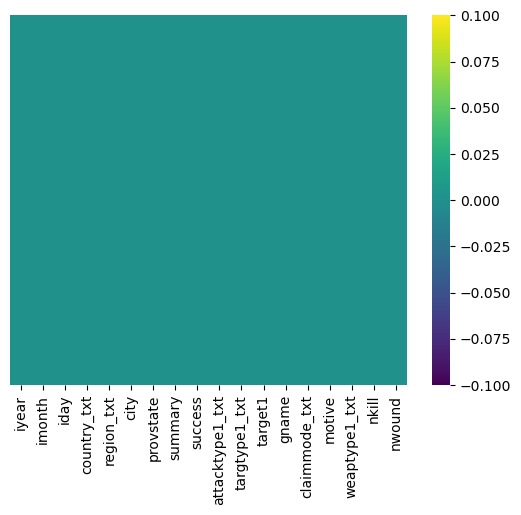

<Figure size 1600x1500 with 0 Axes>

In [42]:
sns.heatmap(df.isnull(), yticklabels = False, cmap='viridis')
plt.figure(figsize=(16,15))

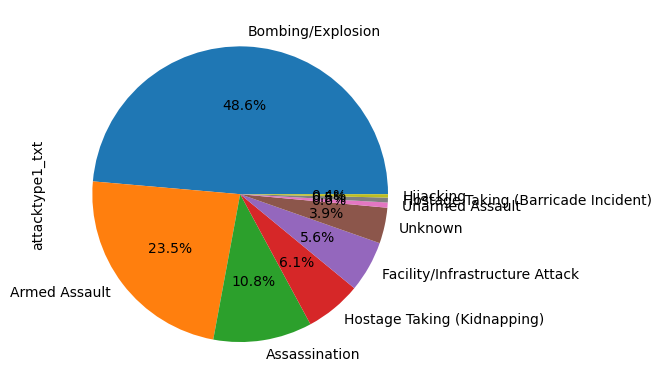

In [43]:
df['attacktype1_txt'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

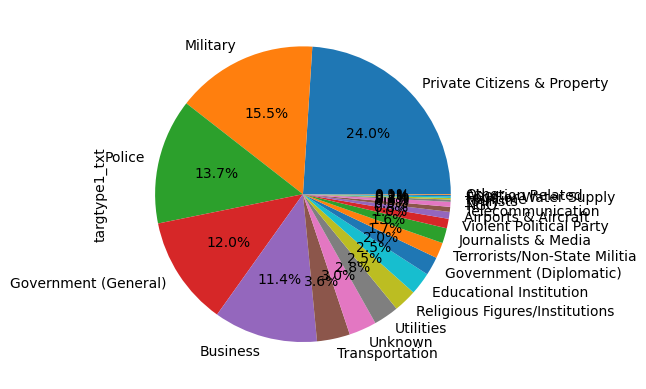

In [44]:
df['targtype1_txt'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

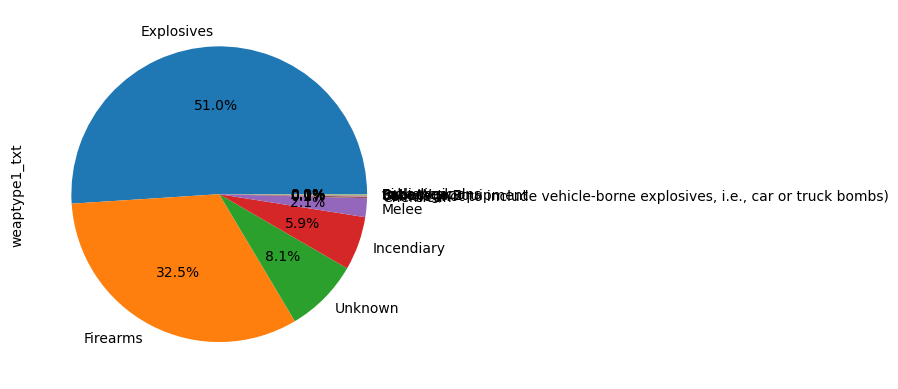

In [45]:
df['weaptype1_txt'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

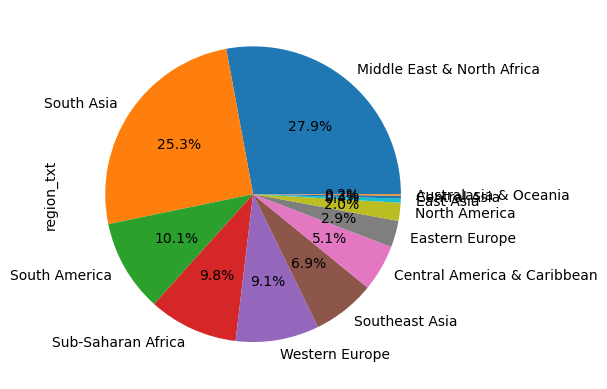

In [46]:
df['region_txt'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

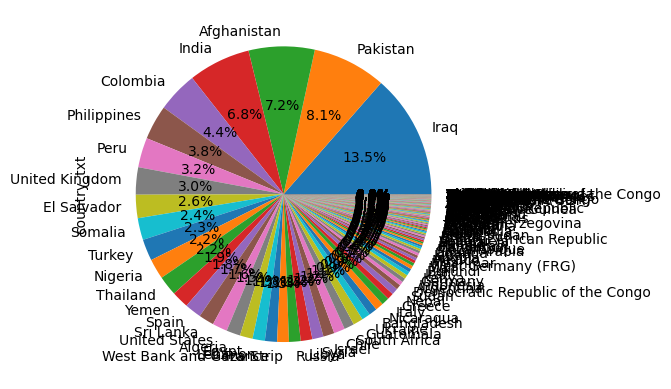

In [47]:
df['country_txt'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

# 1)  Number of Terrorist activities in a region

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


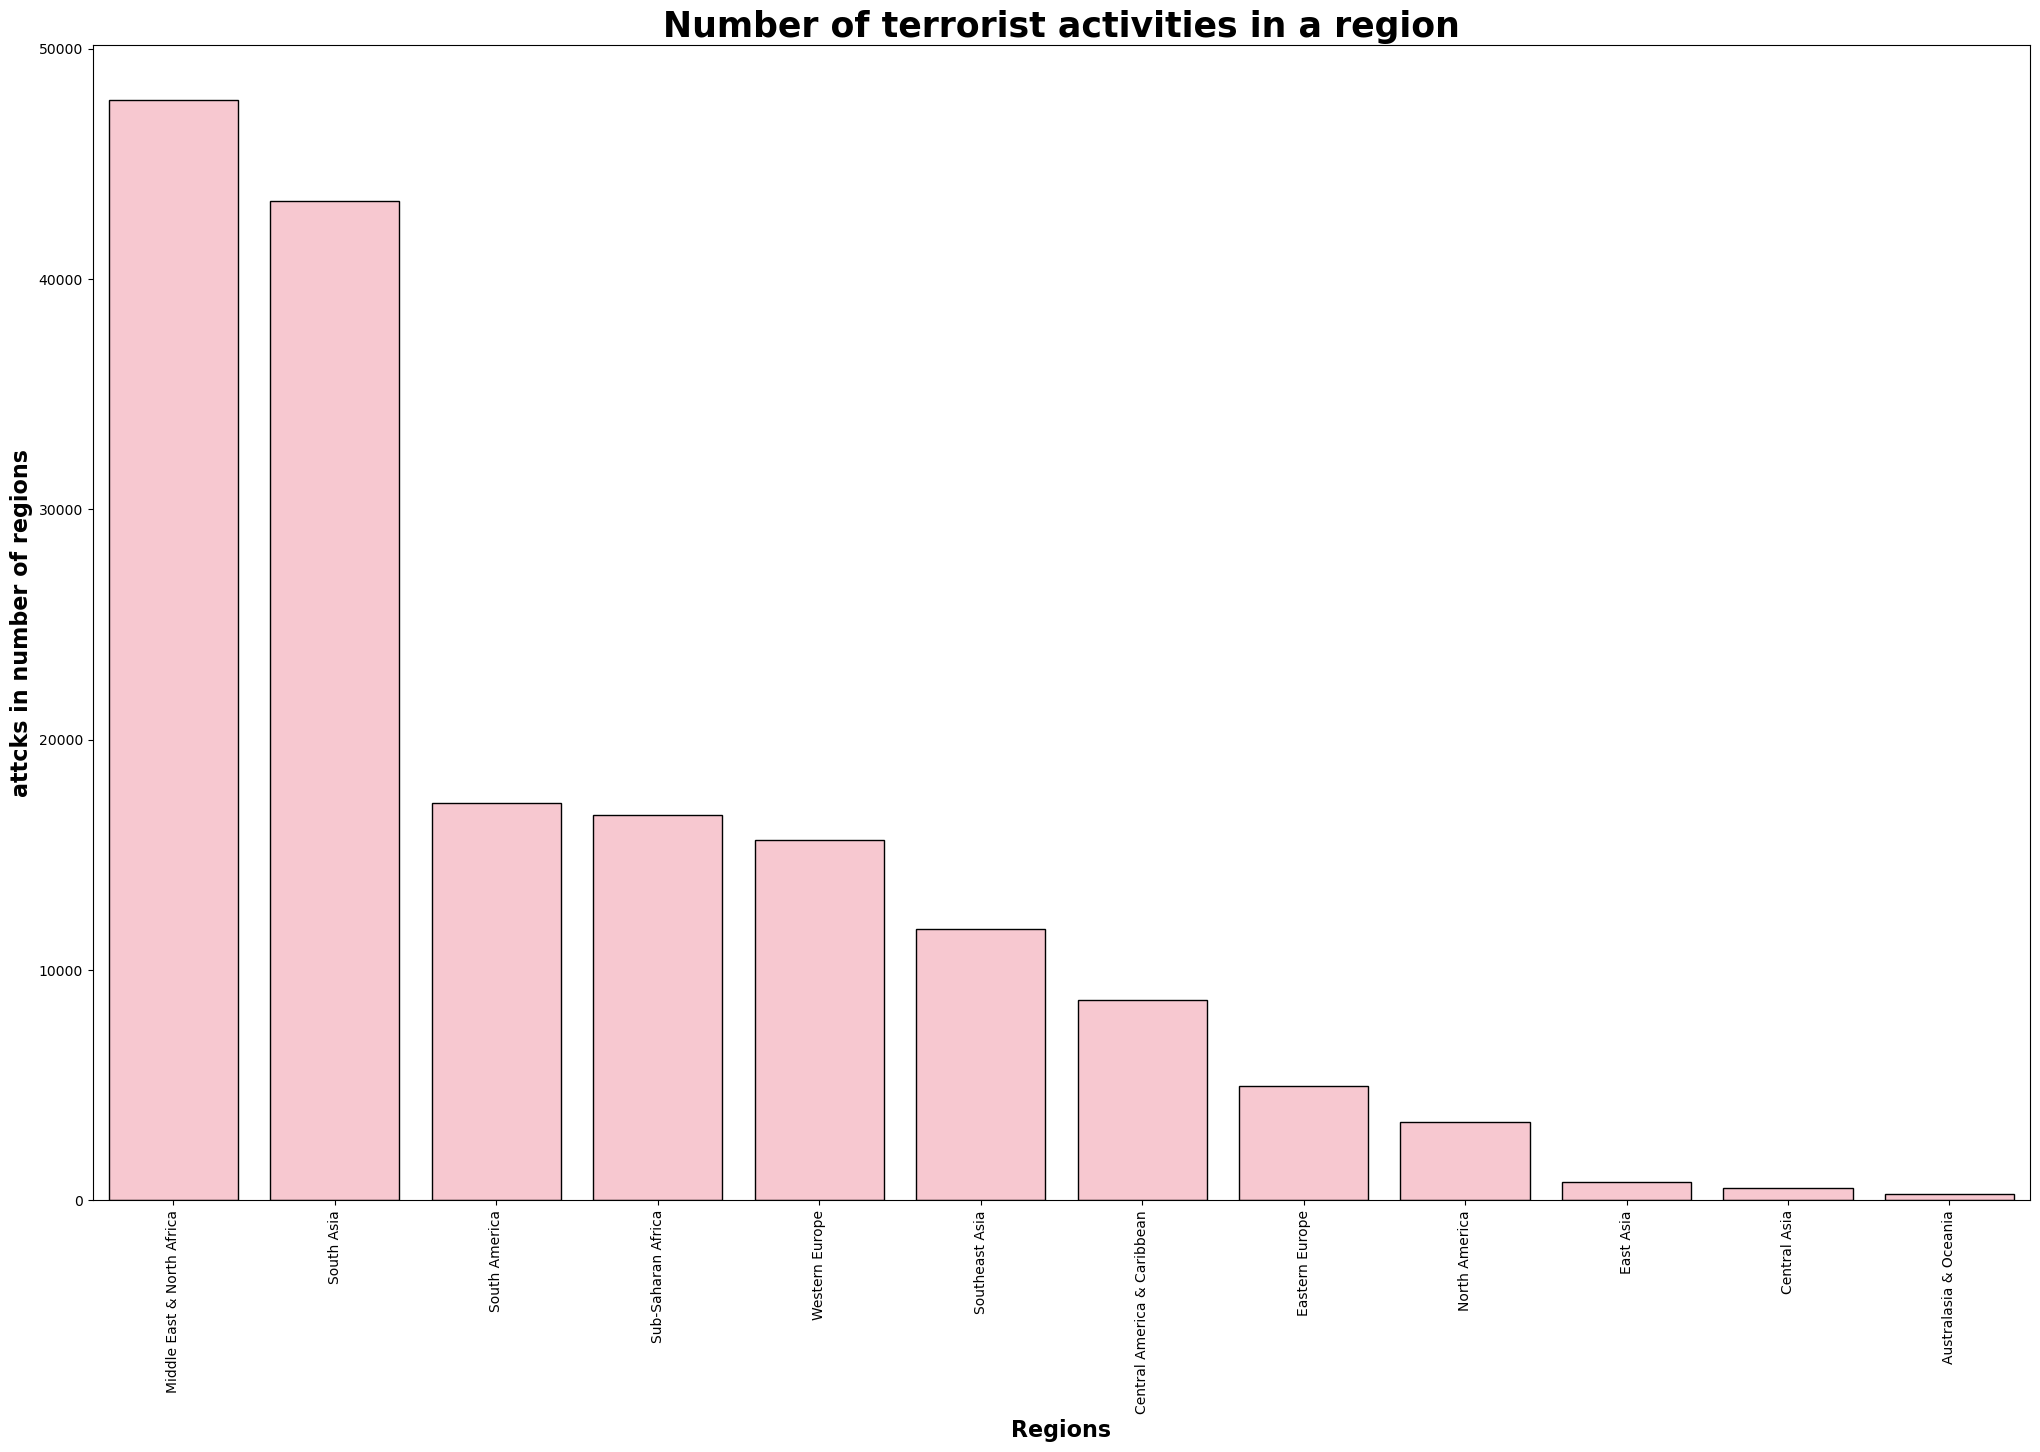

In [50]:
plt.subplots(figsize=(25,15))
sns.countplot(df['region_txt'], order= df['region_txt'].value_counts().index, color='pink', edgecolor='k')
plt.xlabel('Regions', fontweight = 'bold', fontsize = '16')
plt.ylabel('attcks in number of regions', fontweight = 'bold', fontsize = '16')
plt.title('Number of terrorist activities in a region', fontweight = 'bold', fontsize = '25')
plt.xticks(rotation=90)
plt.show()

**1.The region Australia and Ocean has least no.of attacks, and middle East and North Africa has highest attacks**

**===============================================================================================================**

# 2) Attacks in each year

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


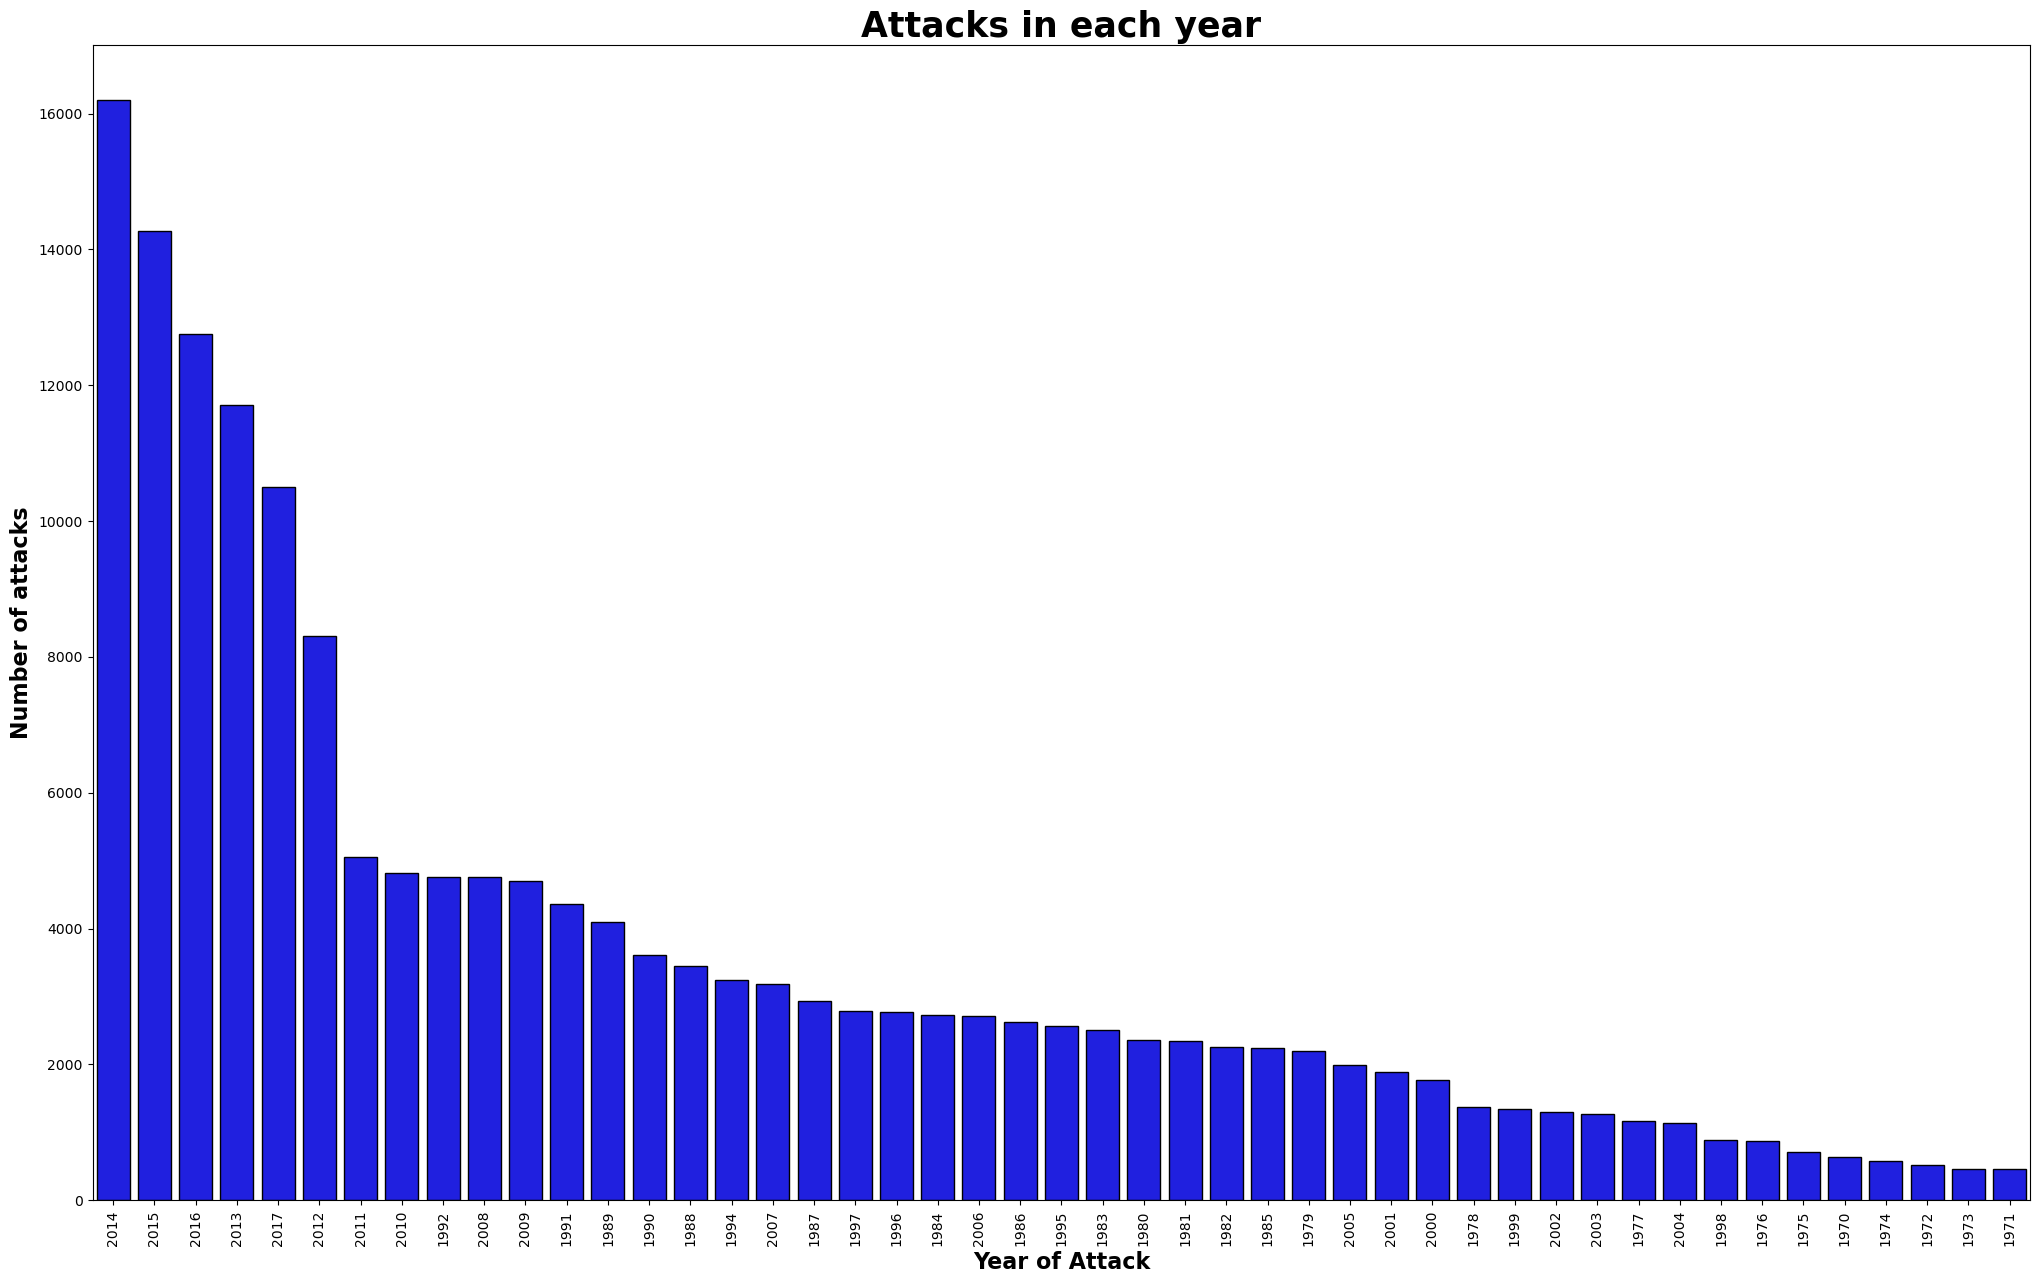

In [51]:
plt.figure(figsize=(25,15))
sns.countplot(df['iyear'], order=df['iyear'].value_counts().index, color='blue', edgecolor = 'k')
plt.xlabel("Year of Attack", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize = 16)
plt.title("Attacks in each year", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation = 90)
plt.show()

**2.Year 1971 has the least amount of attacks and the year 2014 has large amount of attacks** 

**============================================================================================================**

# 3) Type of the attack

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


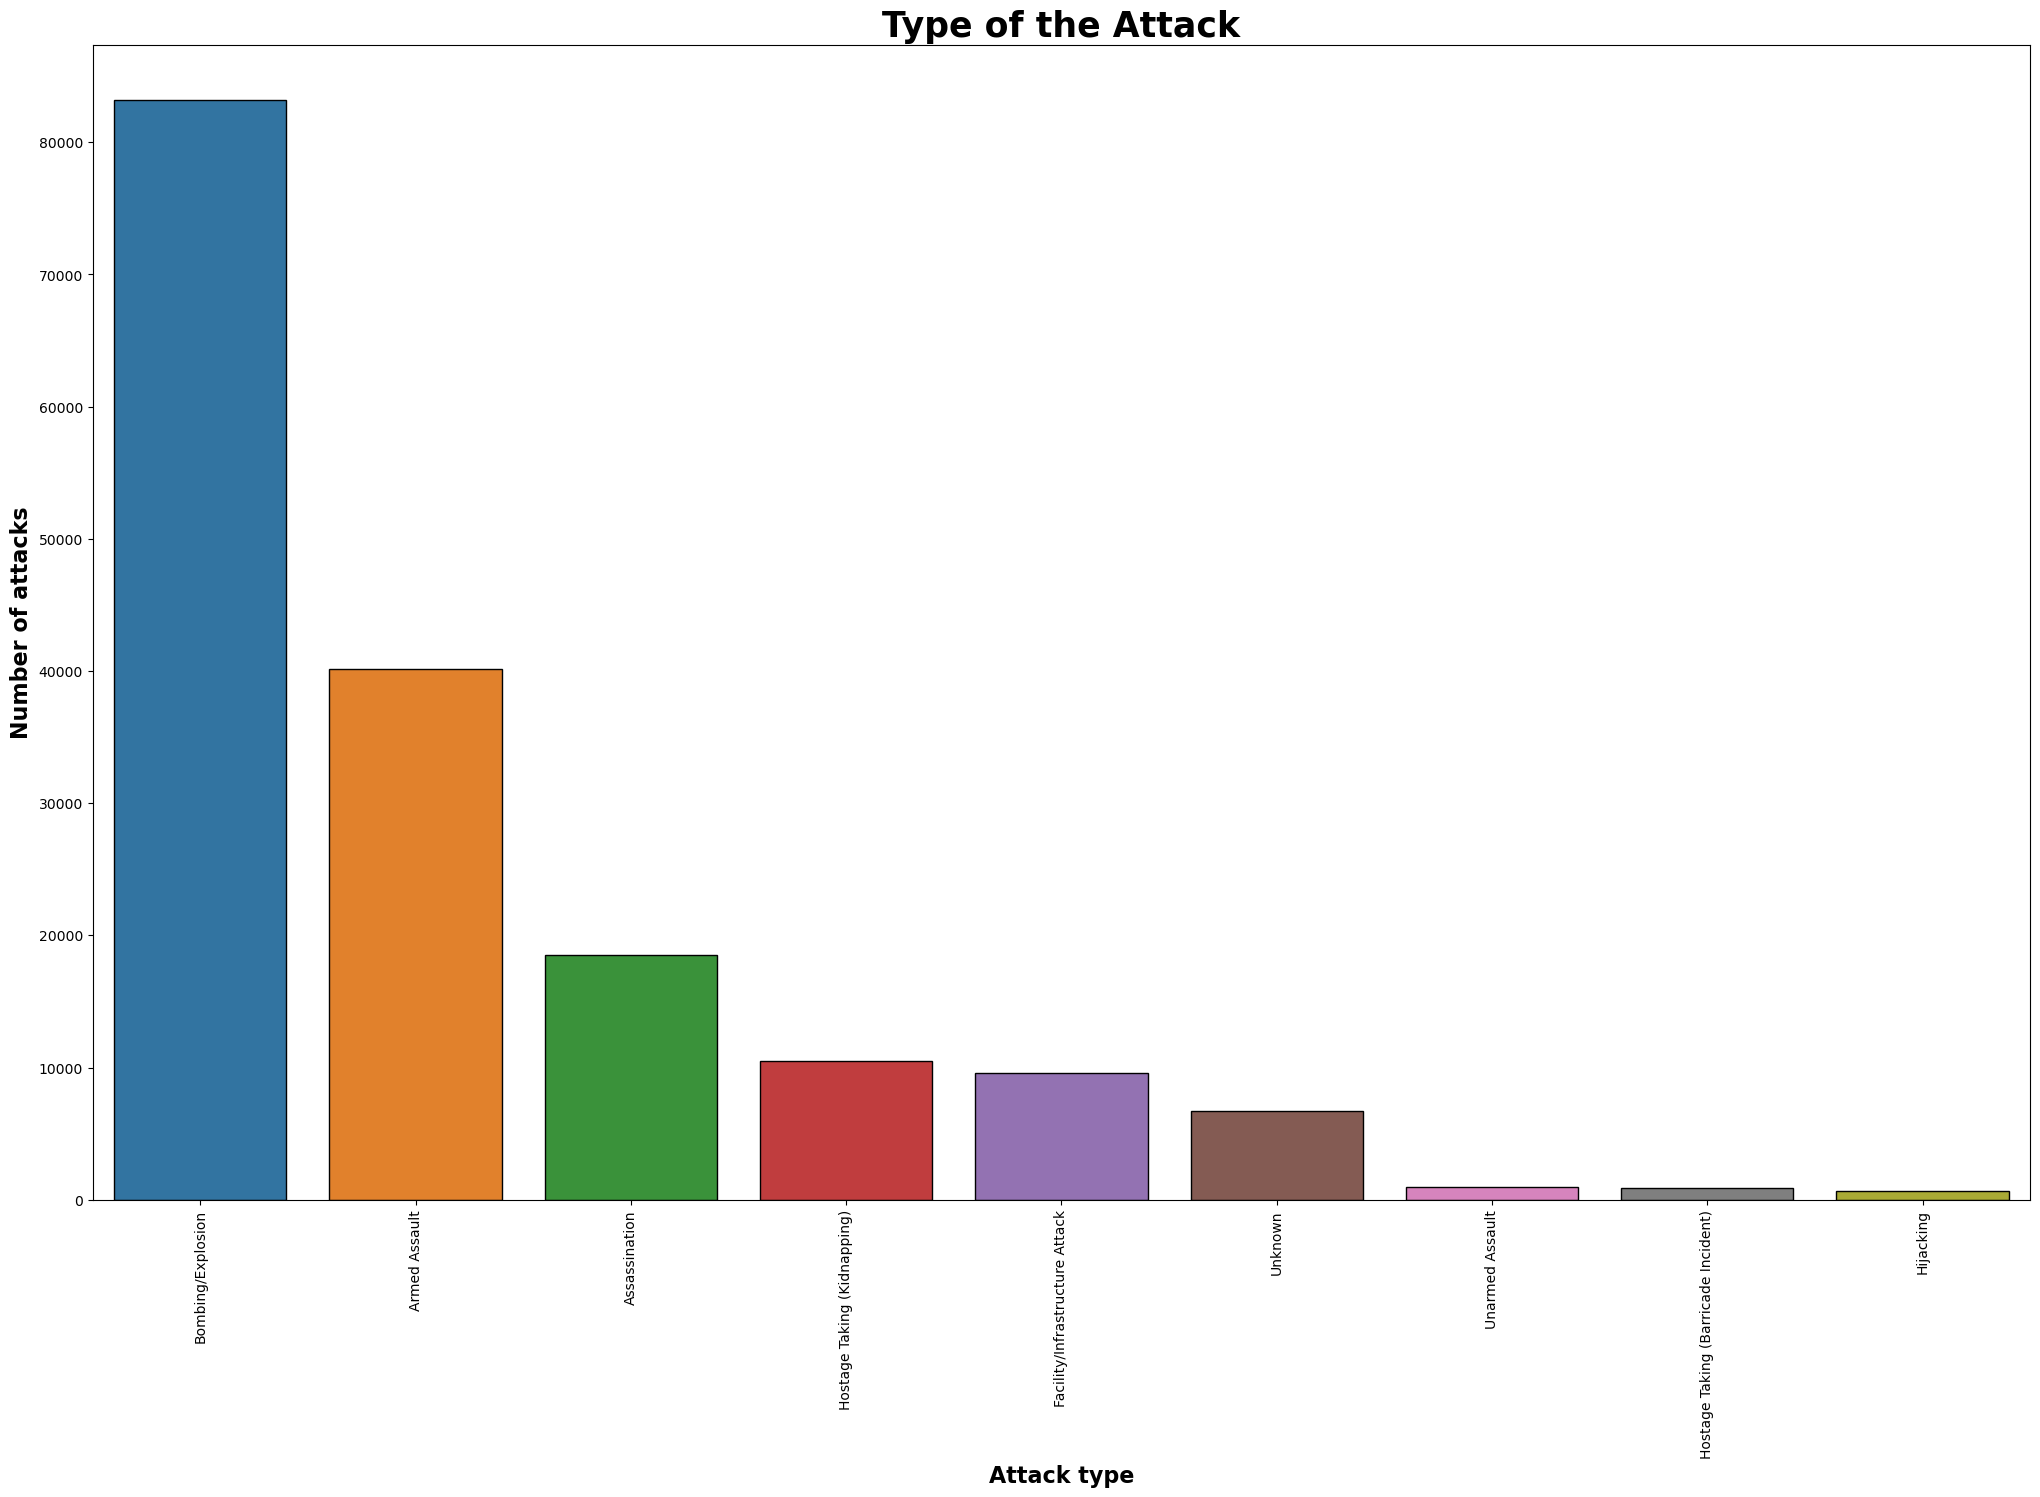

In [52]:
plt.figure(figsize=(25,15))
sns.countplot(df['attacktype1_txt'], order = df['attacktype1_txt'].value_counts().index, edgecolor = 'k')
plt.xlabel("Attack type", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize =16)
plt.title("Type of the Attack", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**3.Bombing explosion is the most used attack type and Hijacking is the least used attack type**

**===================================================================================================================**

# 4) Type of the target

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


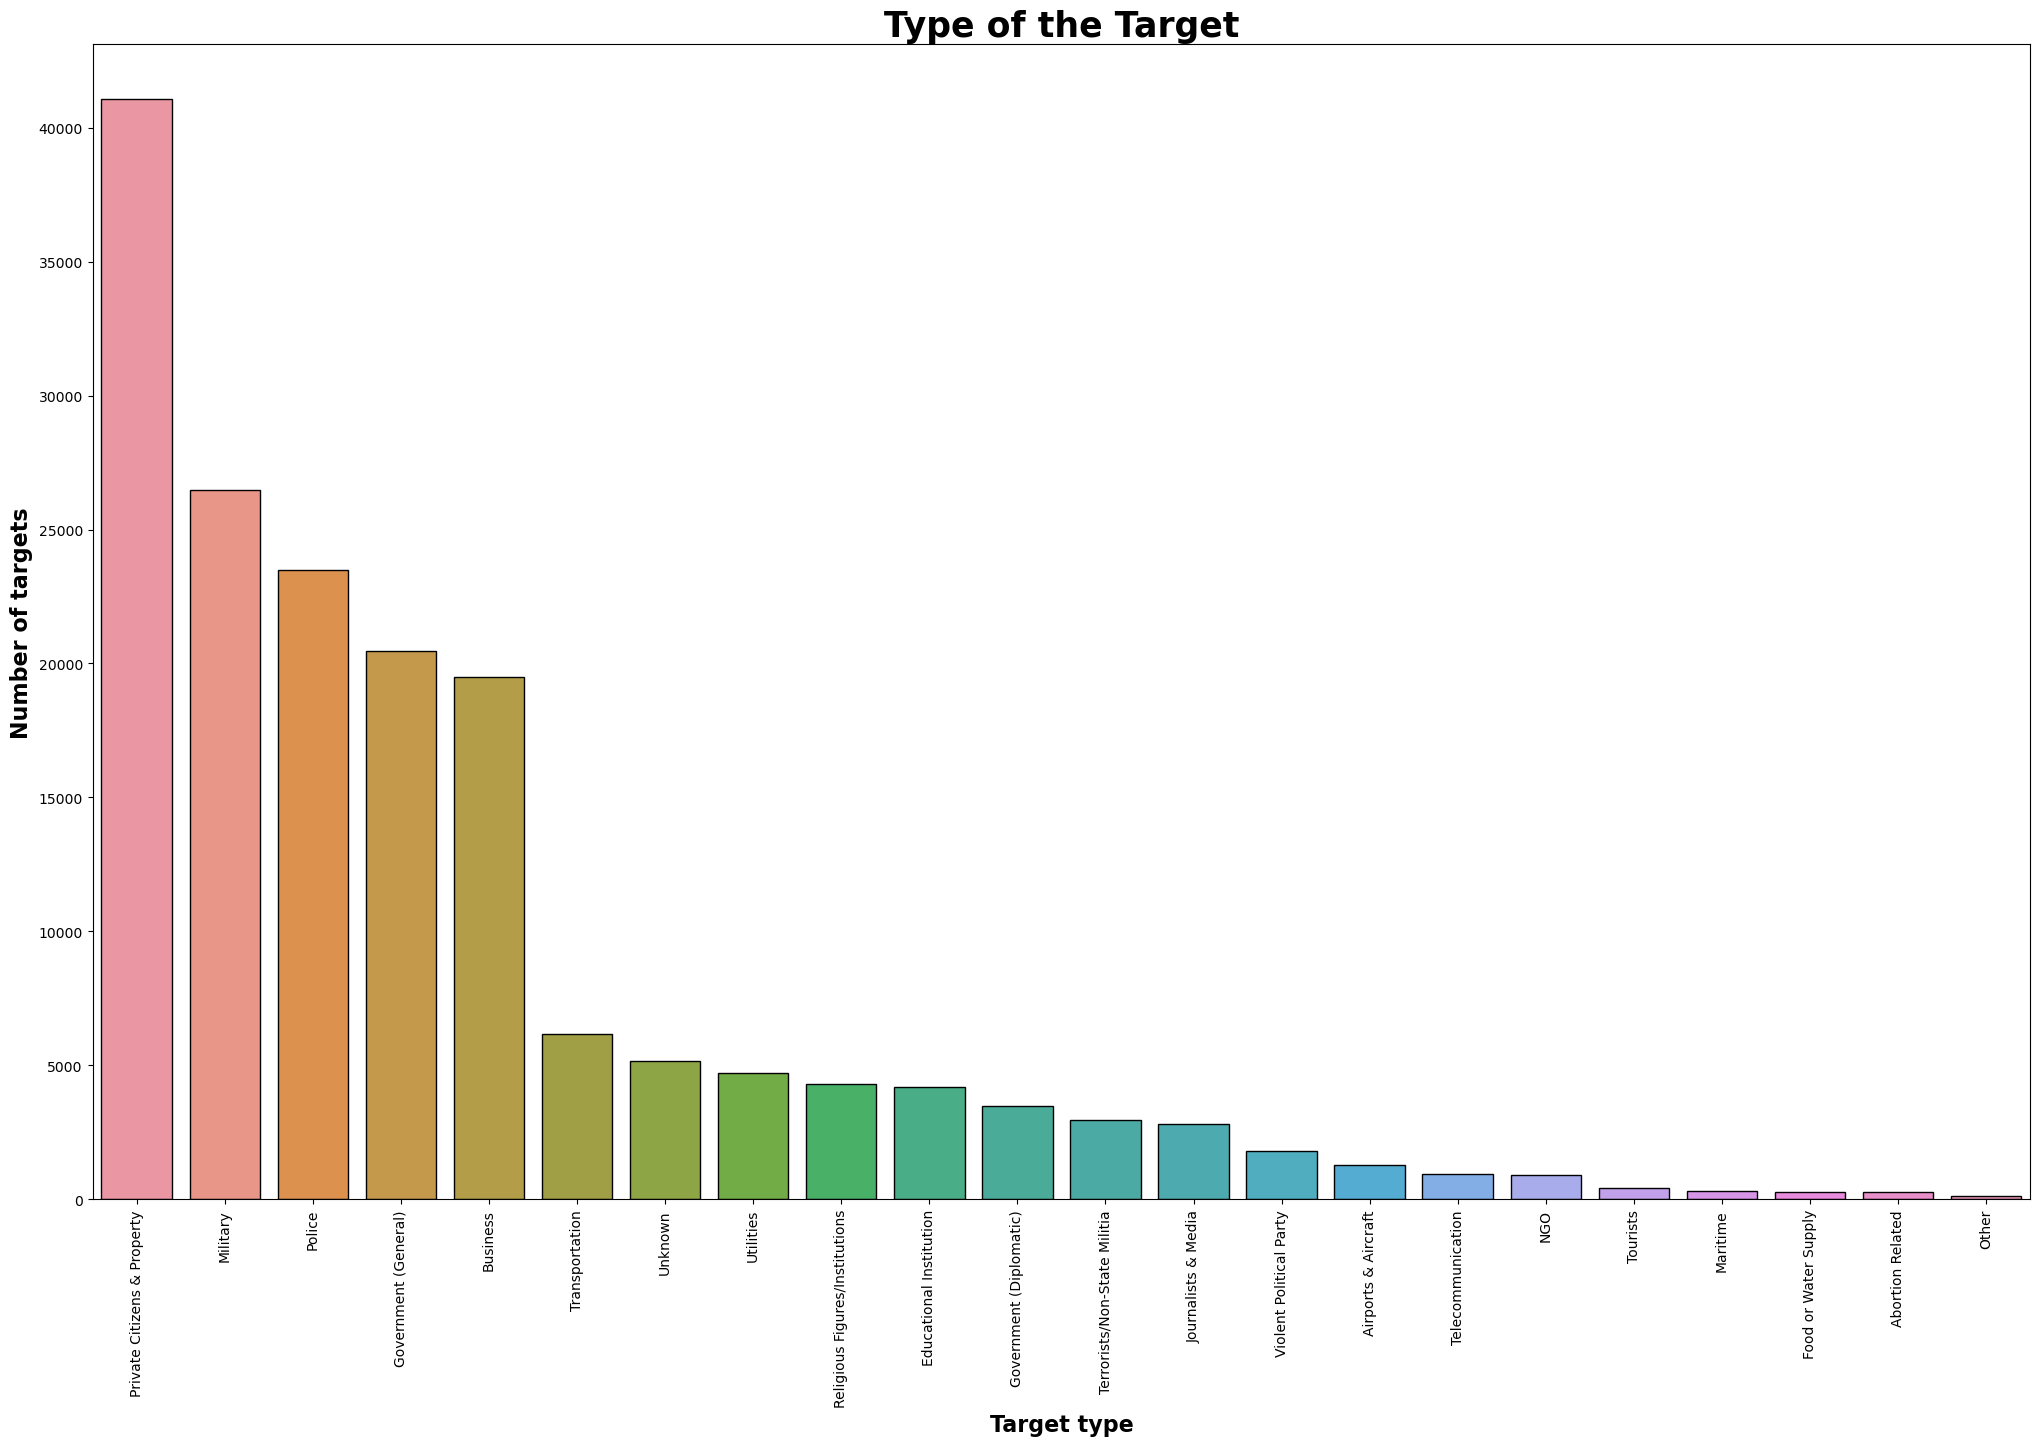

In [53]:
plt.figure(figsize=(25,15))
sns.countplot(df['targtype1_txt'], order = df['targtype1_txt'].value_counts().index, edgecolor = 'k')
plt.xlabel("Target type", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of targets", fontweight = 'bold', fontsize =16)
plt.title("Type of the Target", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**4. Private citizens and properties were mostly targeted**

**=================================================================================================================**

# 5) Type of the weapon

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


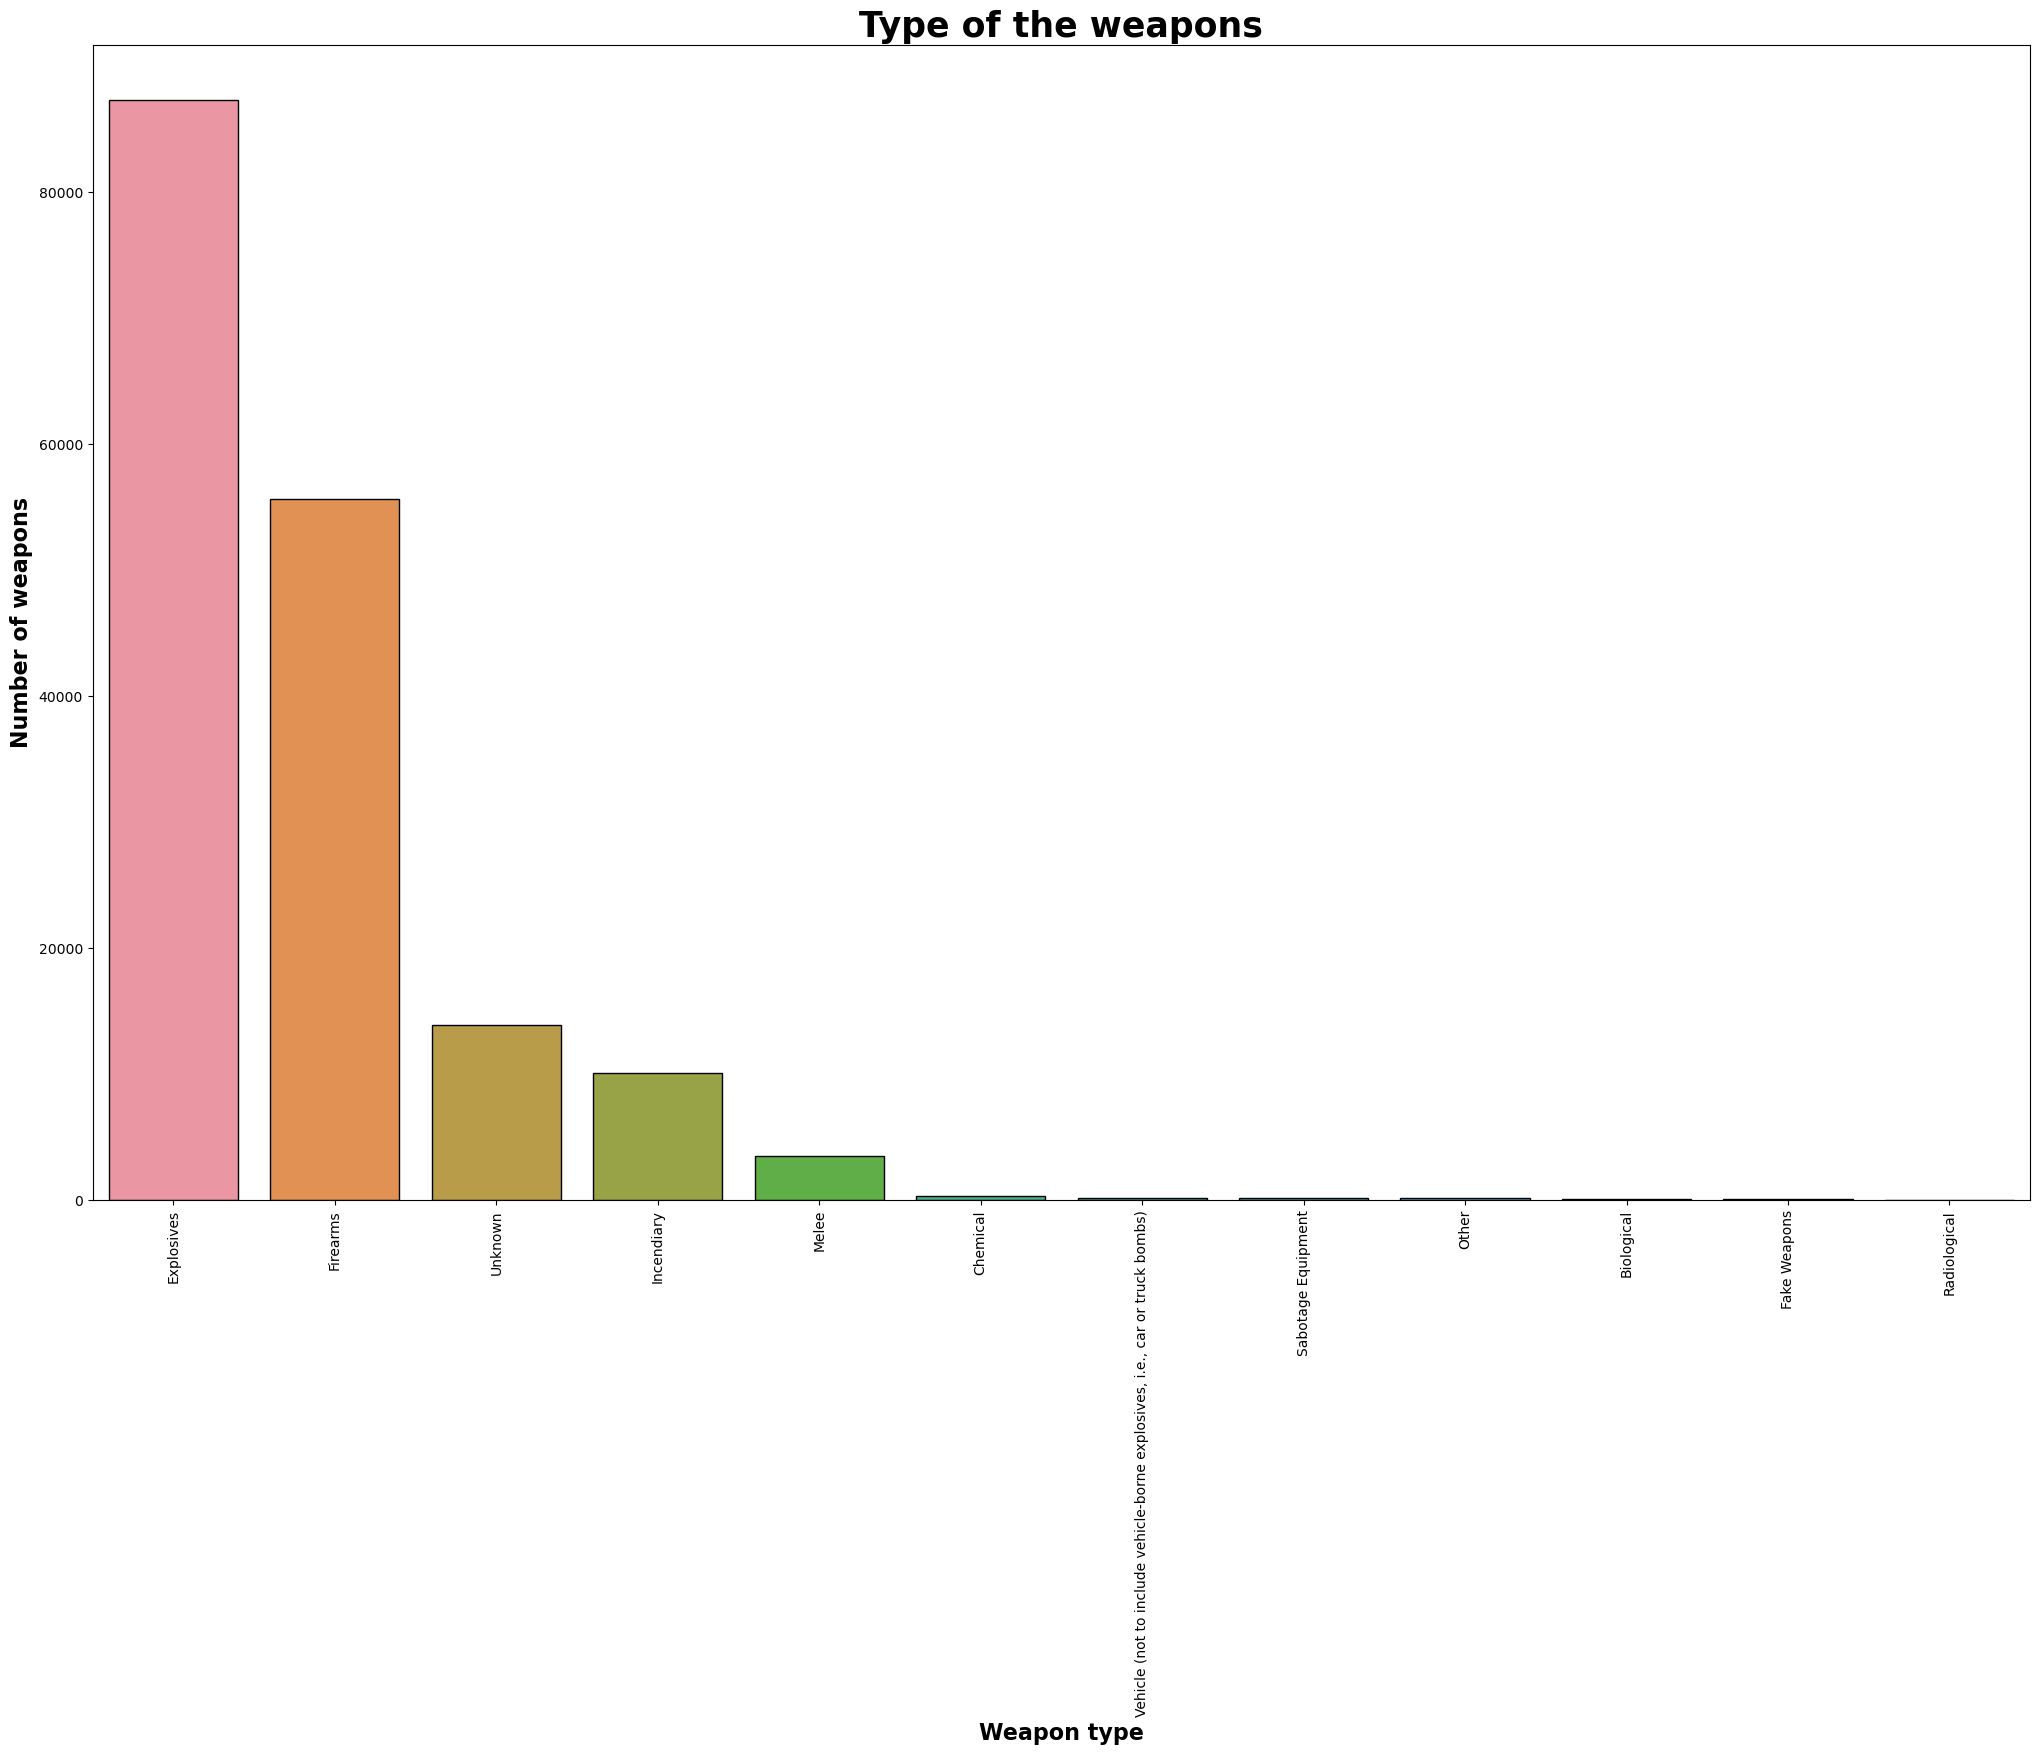

In [54]:
plt.figure(figsize=(25,15))
sns.countplot(df['weaptype1_txt'], order = df['weaptype1_txt'].value_counts().index, edgecolor = 'k')
plt.xlabel("Weapon type", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of weapons", fontweight = 'bold', fontsize =16)
plt.title("Type of the weapons", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**5.Explosive is the most used weapon type**

**====================================================================================================================**

# 6) Successful and unsuccessful attacks per year

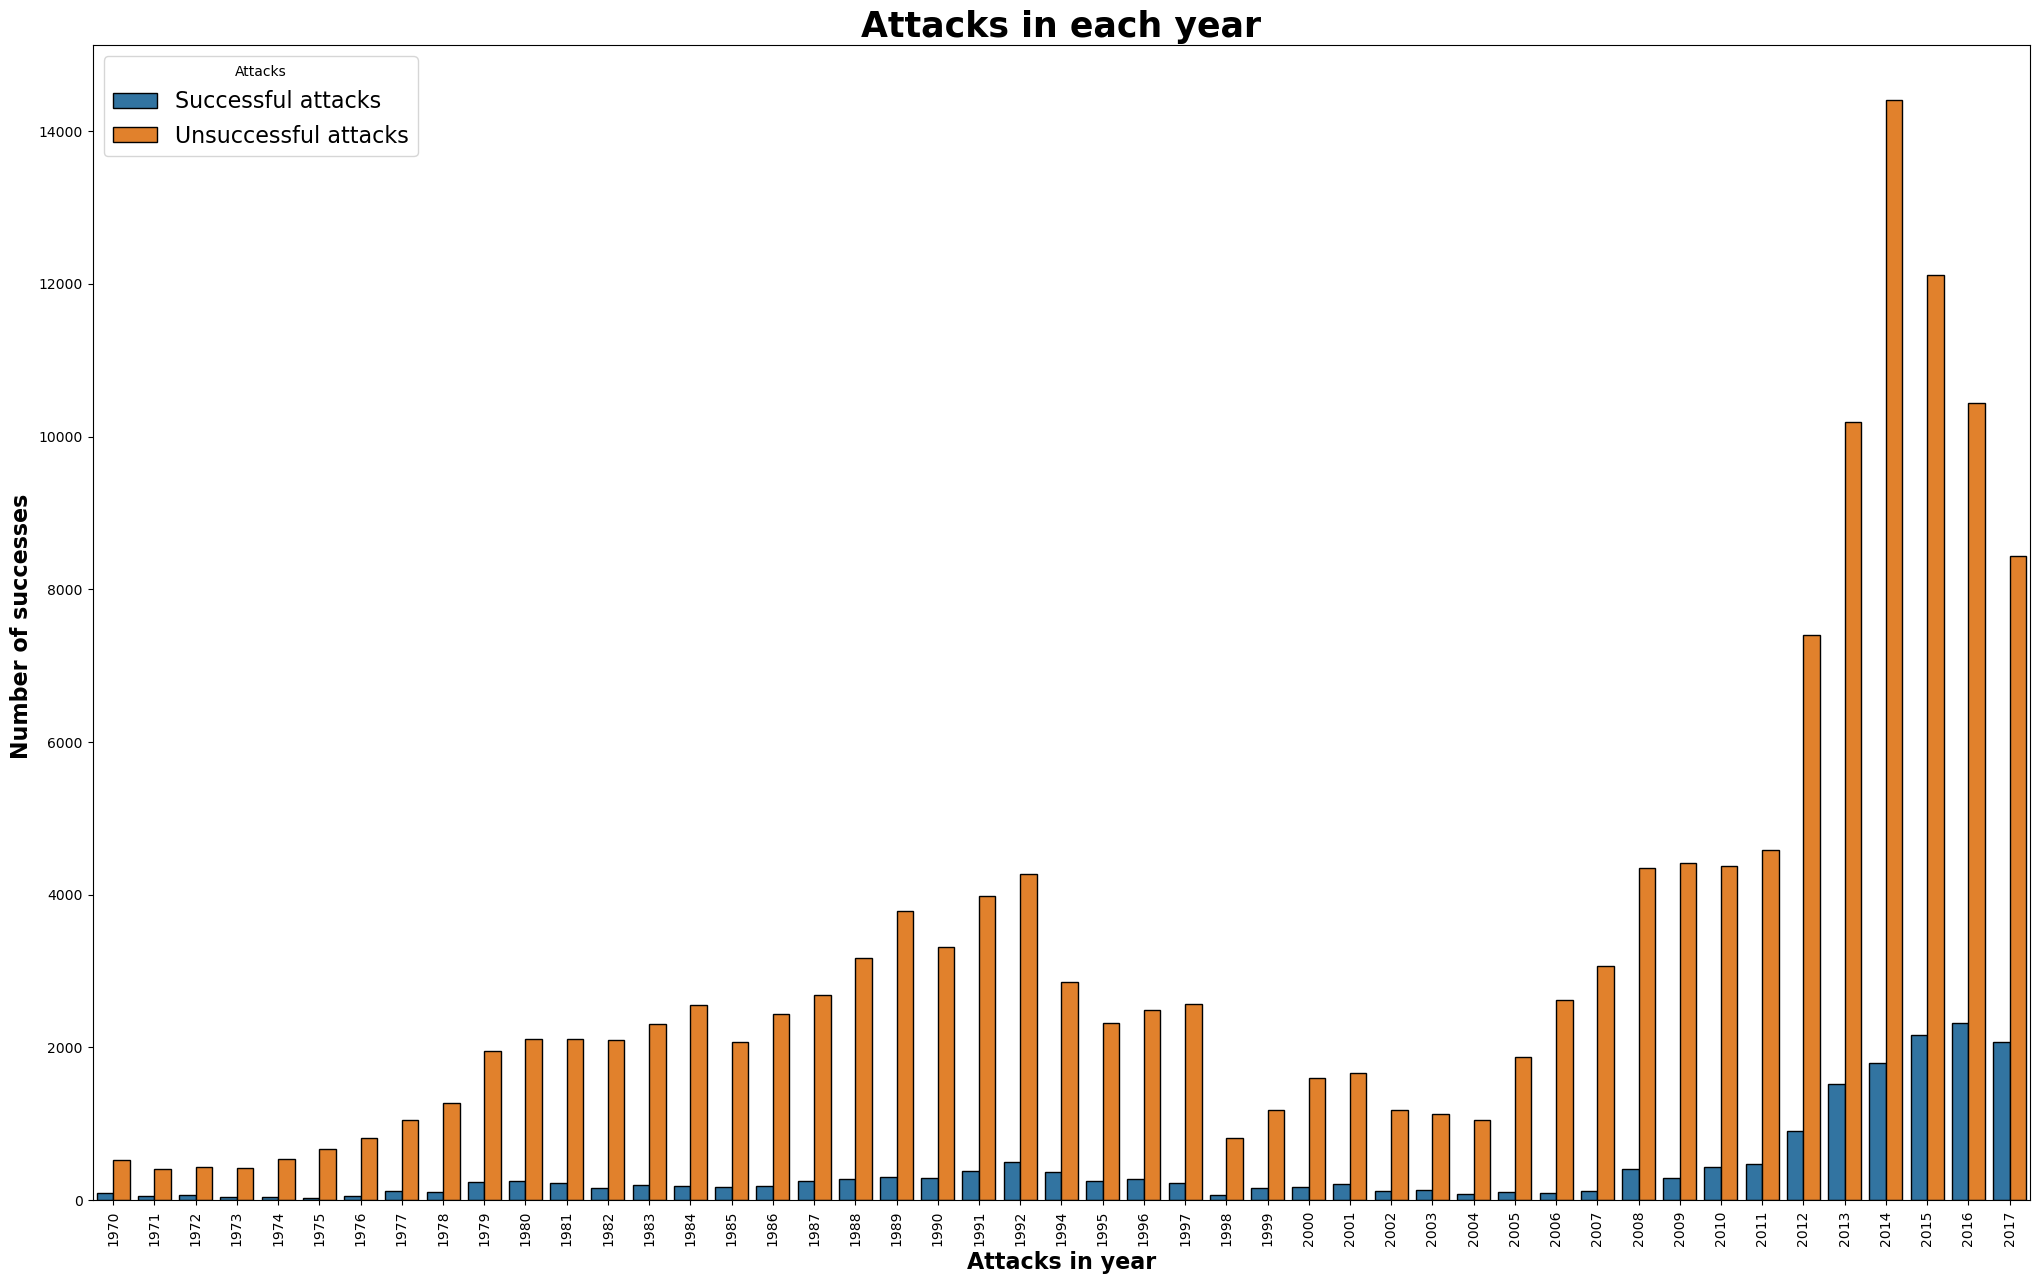

In [55]:
plt.figure(figsize=(25,15))
sns.countplot(x = df['iyear'], hue = 'success', data =df, edgecolor = 'k')
plt.xlabel("Attacks in year", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of successes ", fontweight = 'bold', fontsize =16)
plt.title("Attacks in each year", fontweight = 'bold', fontsize = 25)
plt.legend(title = 'Attacks', loc = 'upper left', labels = ['Successful attacks', 'Unsuccessful attacks'], fontsize = 16)
plt.xticks(rotation=90)
plt.show()

**6.The year 2014 has more successful attacks and the year 2016 has the most unsuccessful attacks**

**===================================================================================================================**

# 7) Attackers Group

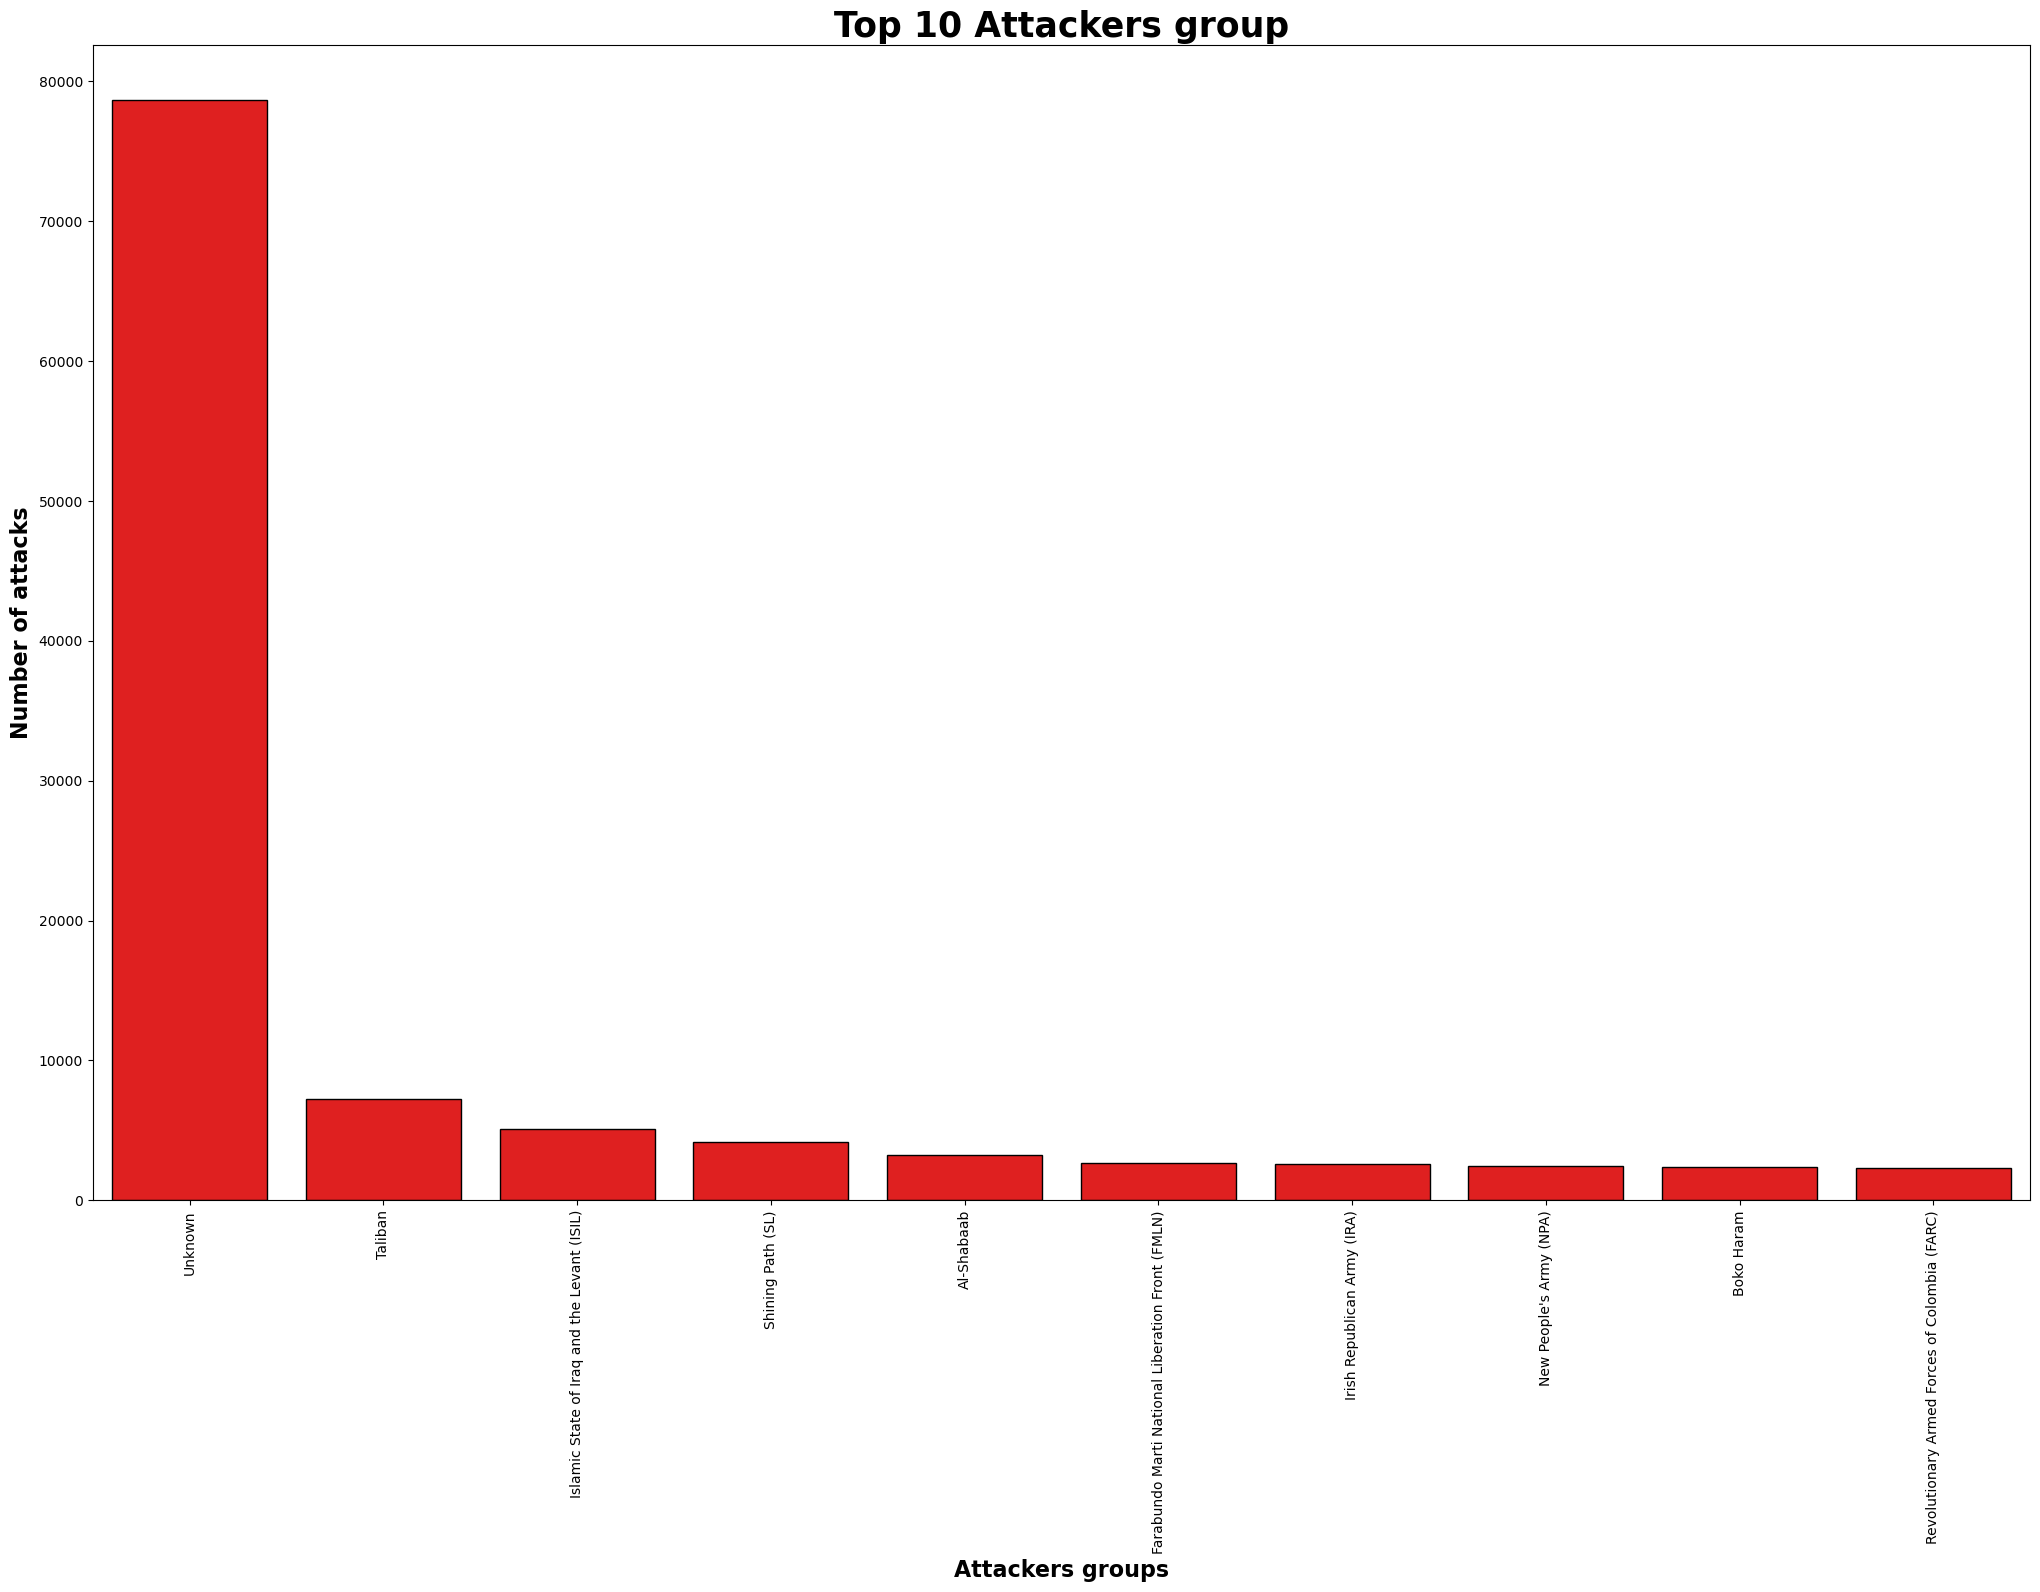

In [56]:
plt.figure(figsize=(25,15))
sns.countplot(x = df['gname'],order = df['gname'].value_counts()[:10].index,color = 'red', edgecolor = 'k')
plt.xlabel("Attackers groups", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize =16)
plt.title("Top 10 Attackers group", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**7.The unknown group was the most attacked group**

**===============================================================================================================**

# 8) Motives for the attack

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


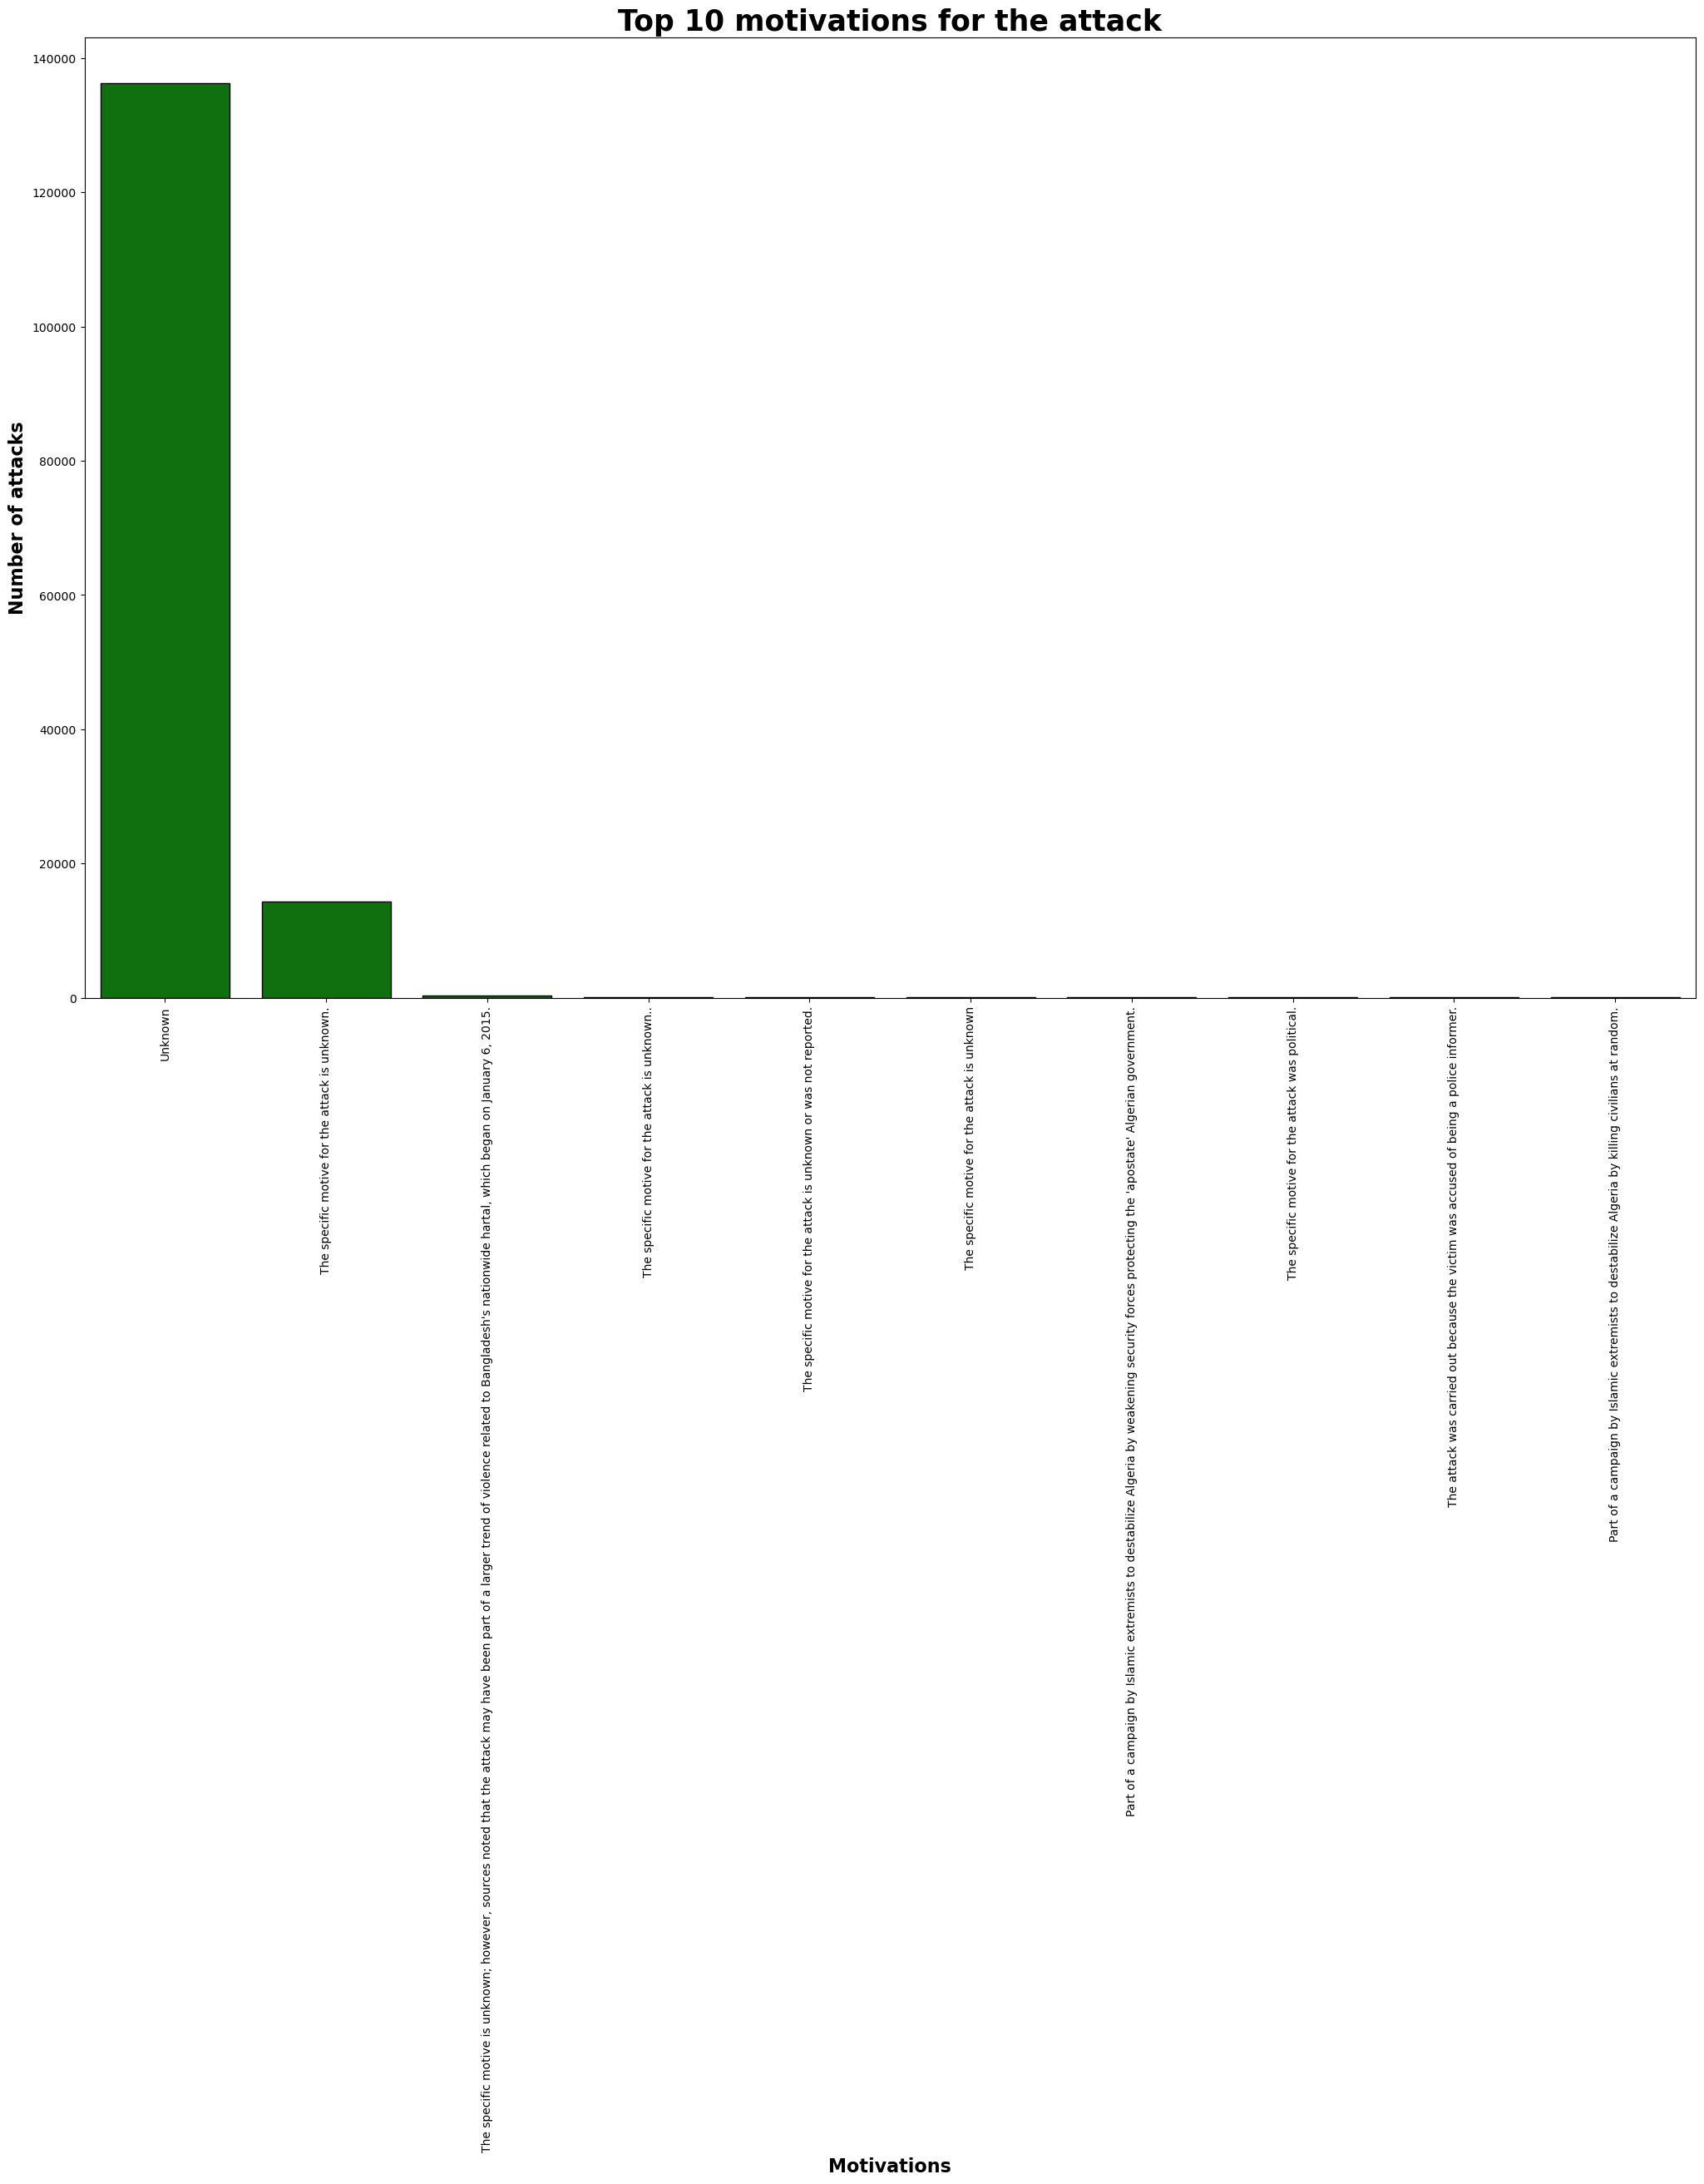

In [57]:
plt.figure(figsize=(25,15))
sns.countplot(df['motive'], order = df['motive'].value_counts()[:10].index,color='green', edgecolor = 'k')
plt.xlabel("Motivations", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize =16)
plt.title("Top 10 motivations for the attack", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**8.The highest motivation for the attack is Unknown**

**====================================================================================================================**

# 9) Claim modes for the attack

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


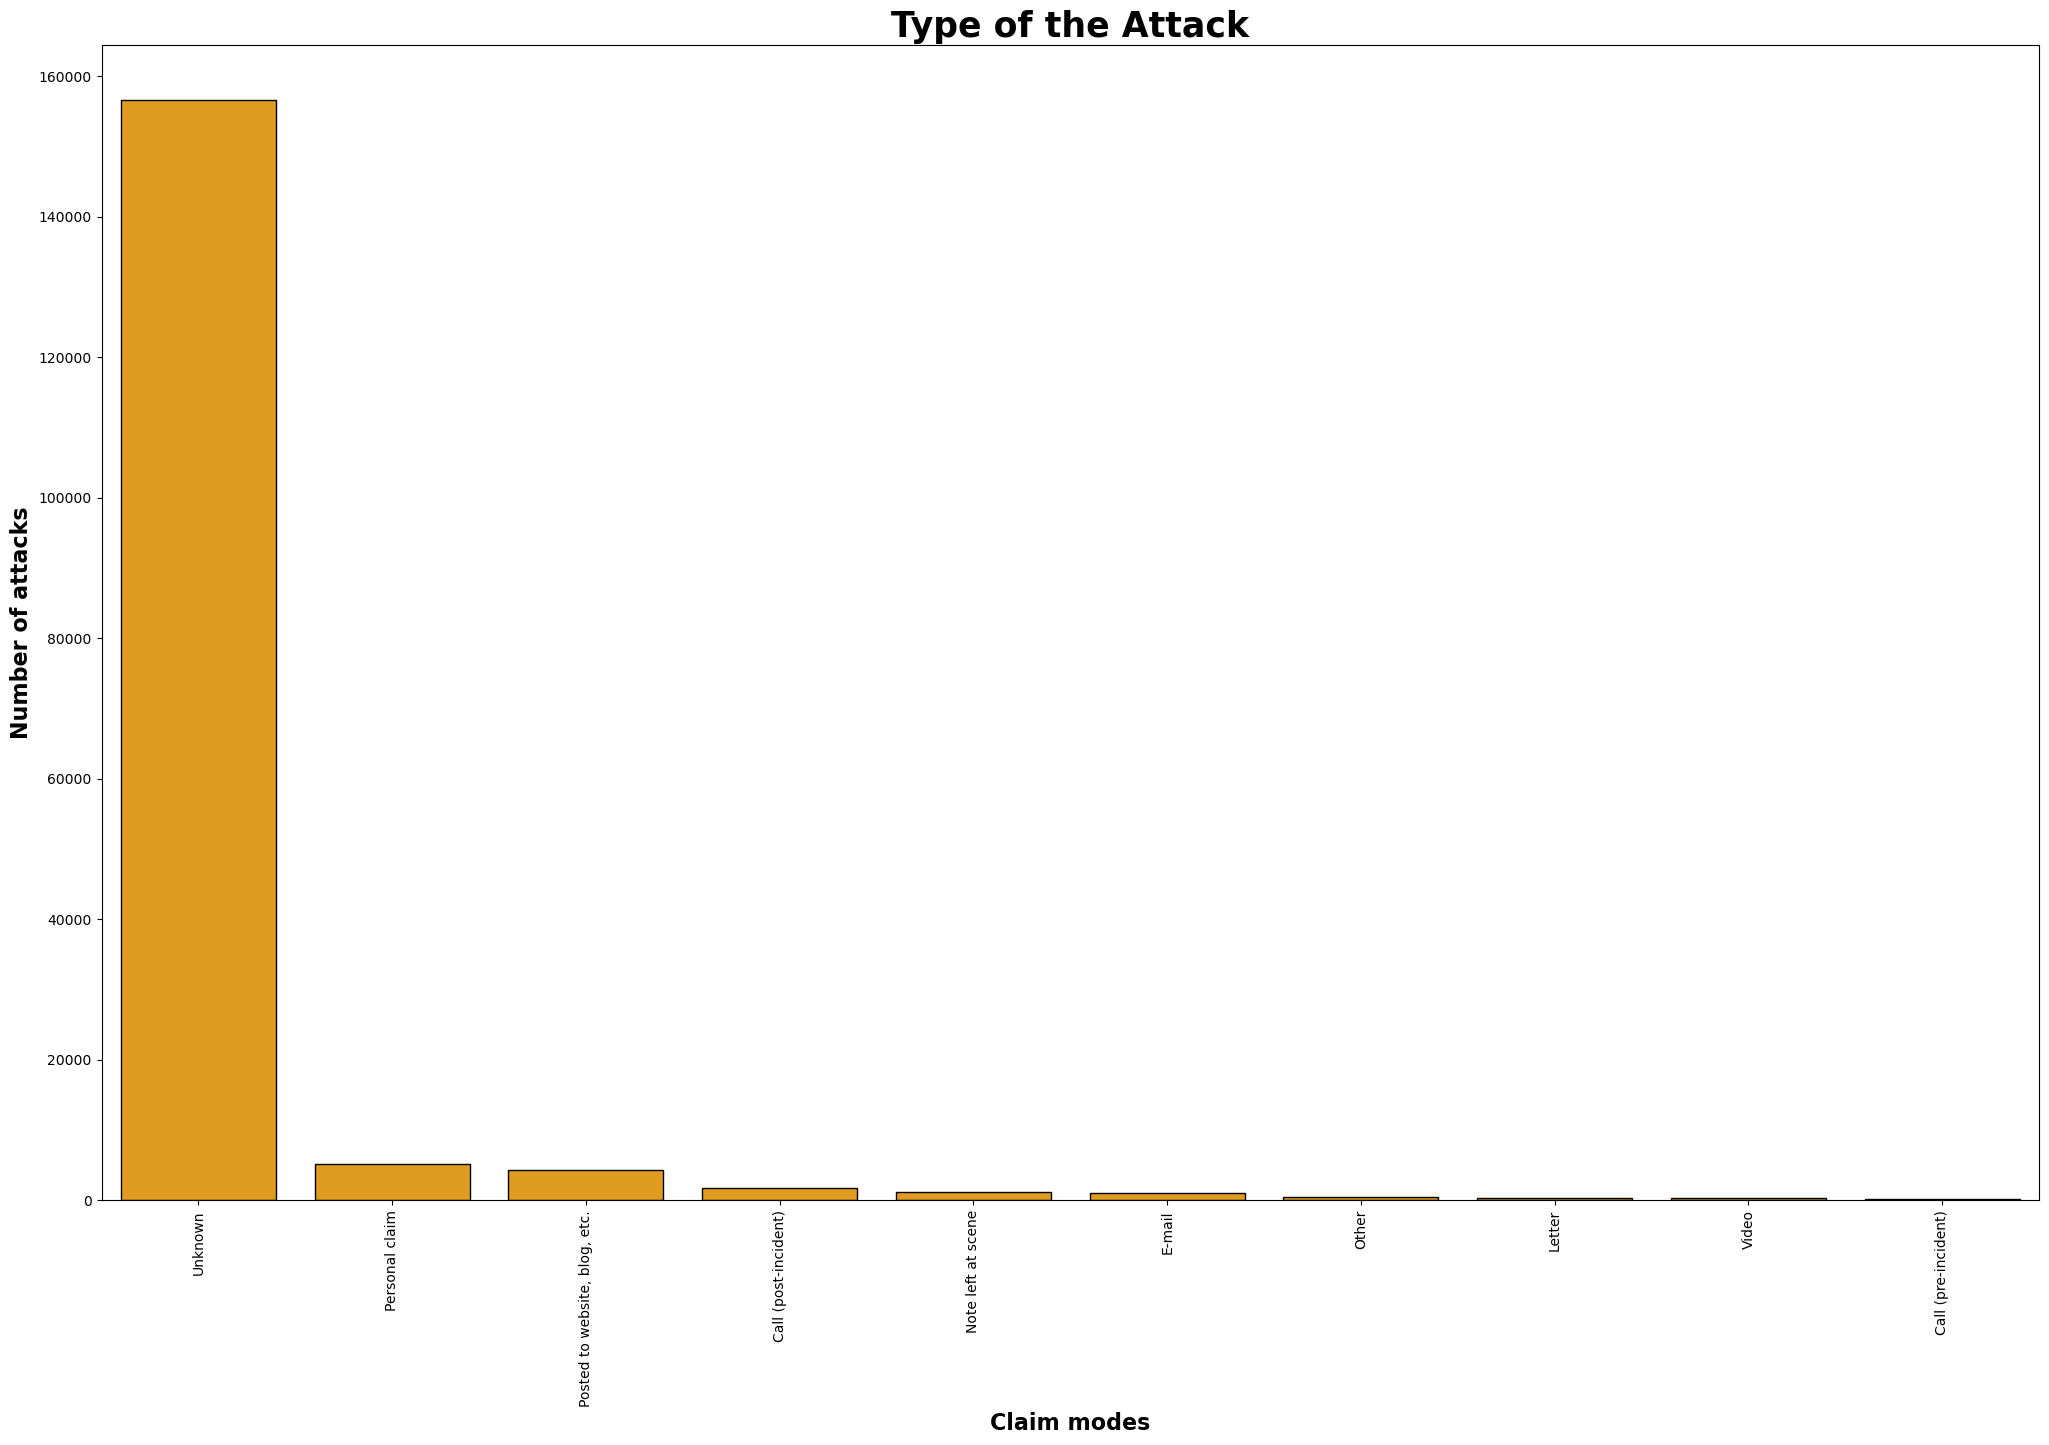

In [58]:
plt.figure(figsize=(25,15))
sns.countplot(df['claimmode_txt'], order = df['claimmode_txt'].value_counts().index,color='orange', edgecolor = 'k')
plt.xlabel("Claim modes", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize =16)
plt.title("Type of the Attack", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**9.The highest claimmode is Unknown for the attack**

**====================================================================================================================**

# 10) Summary of the attack

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


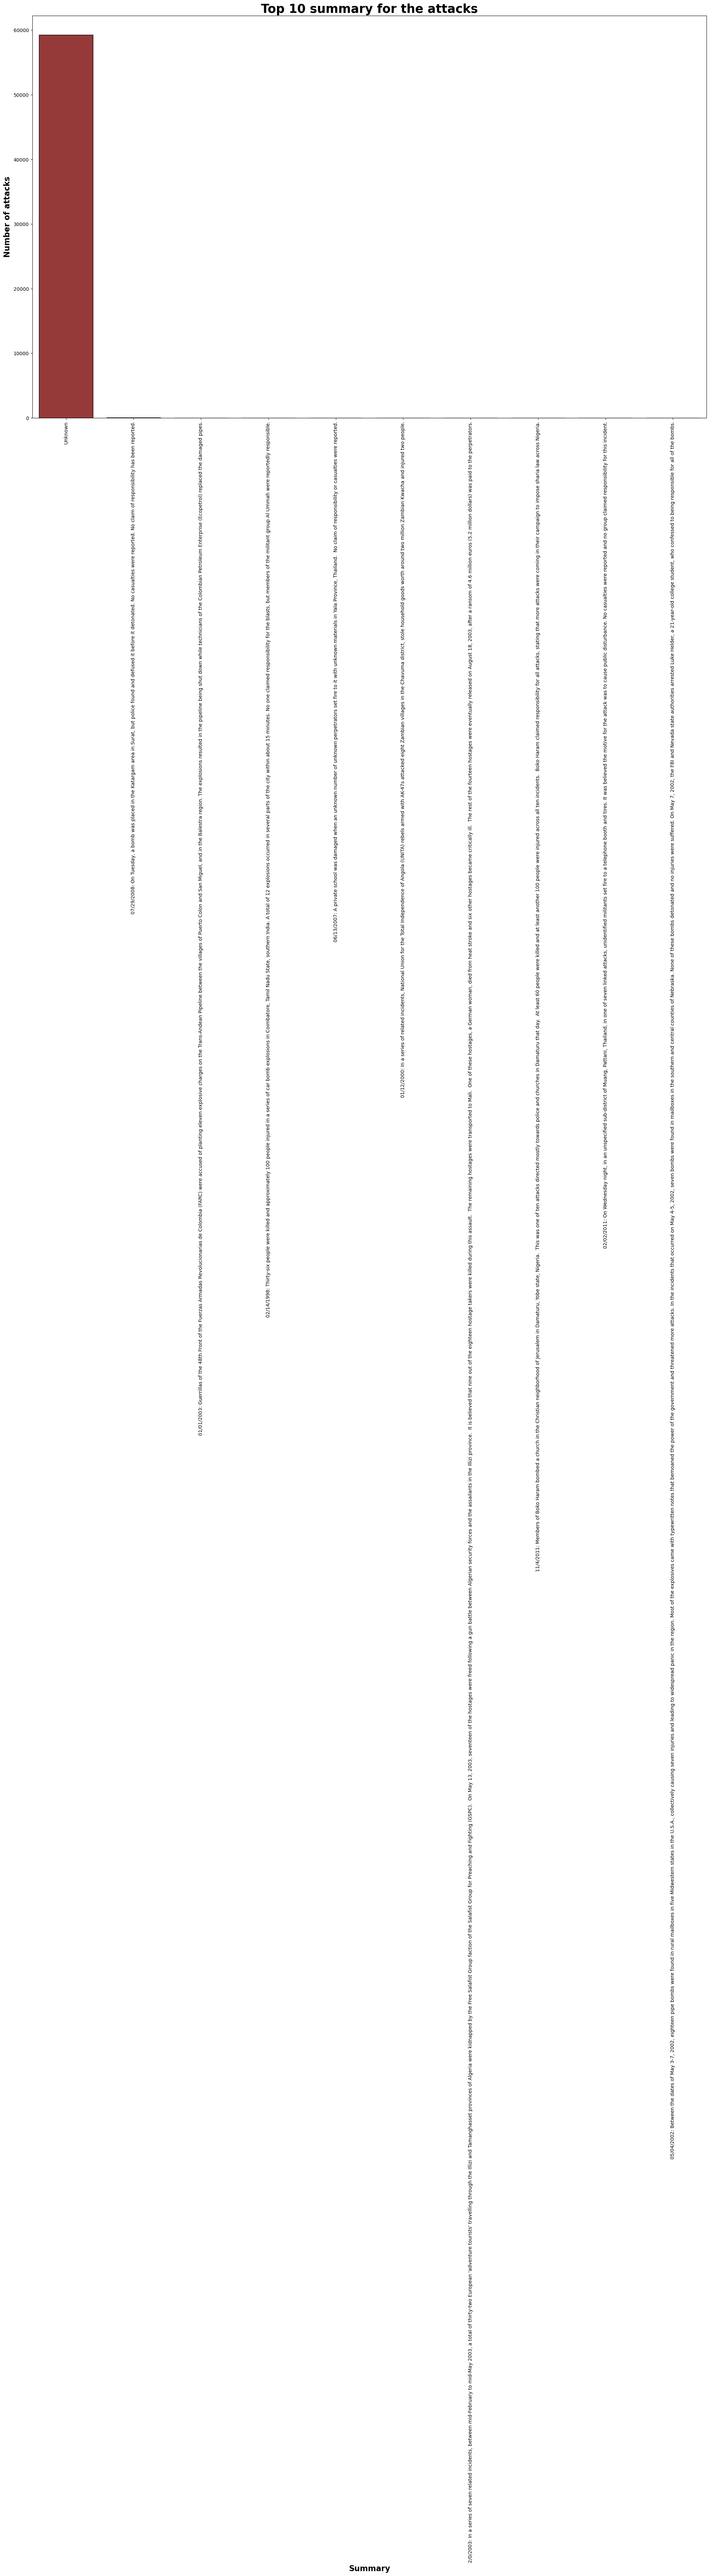

In [59]:
plt.figure(figsize=(25,15))
sns.countplot(df['summary'], order = df['summary'].value_counts()[:10].index, color='brown', edgecolor = 'k')
plt.xlabel("Summary", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize =16)
plt.title("Top 10 summary for the attacks", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**10.Most of the attacks have unknown summary**

**========================================================================================================================**

# 11) Taregets of the attack

C:\Users\ELCOT\anaconda3\Saranya_prgms\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


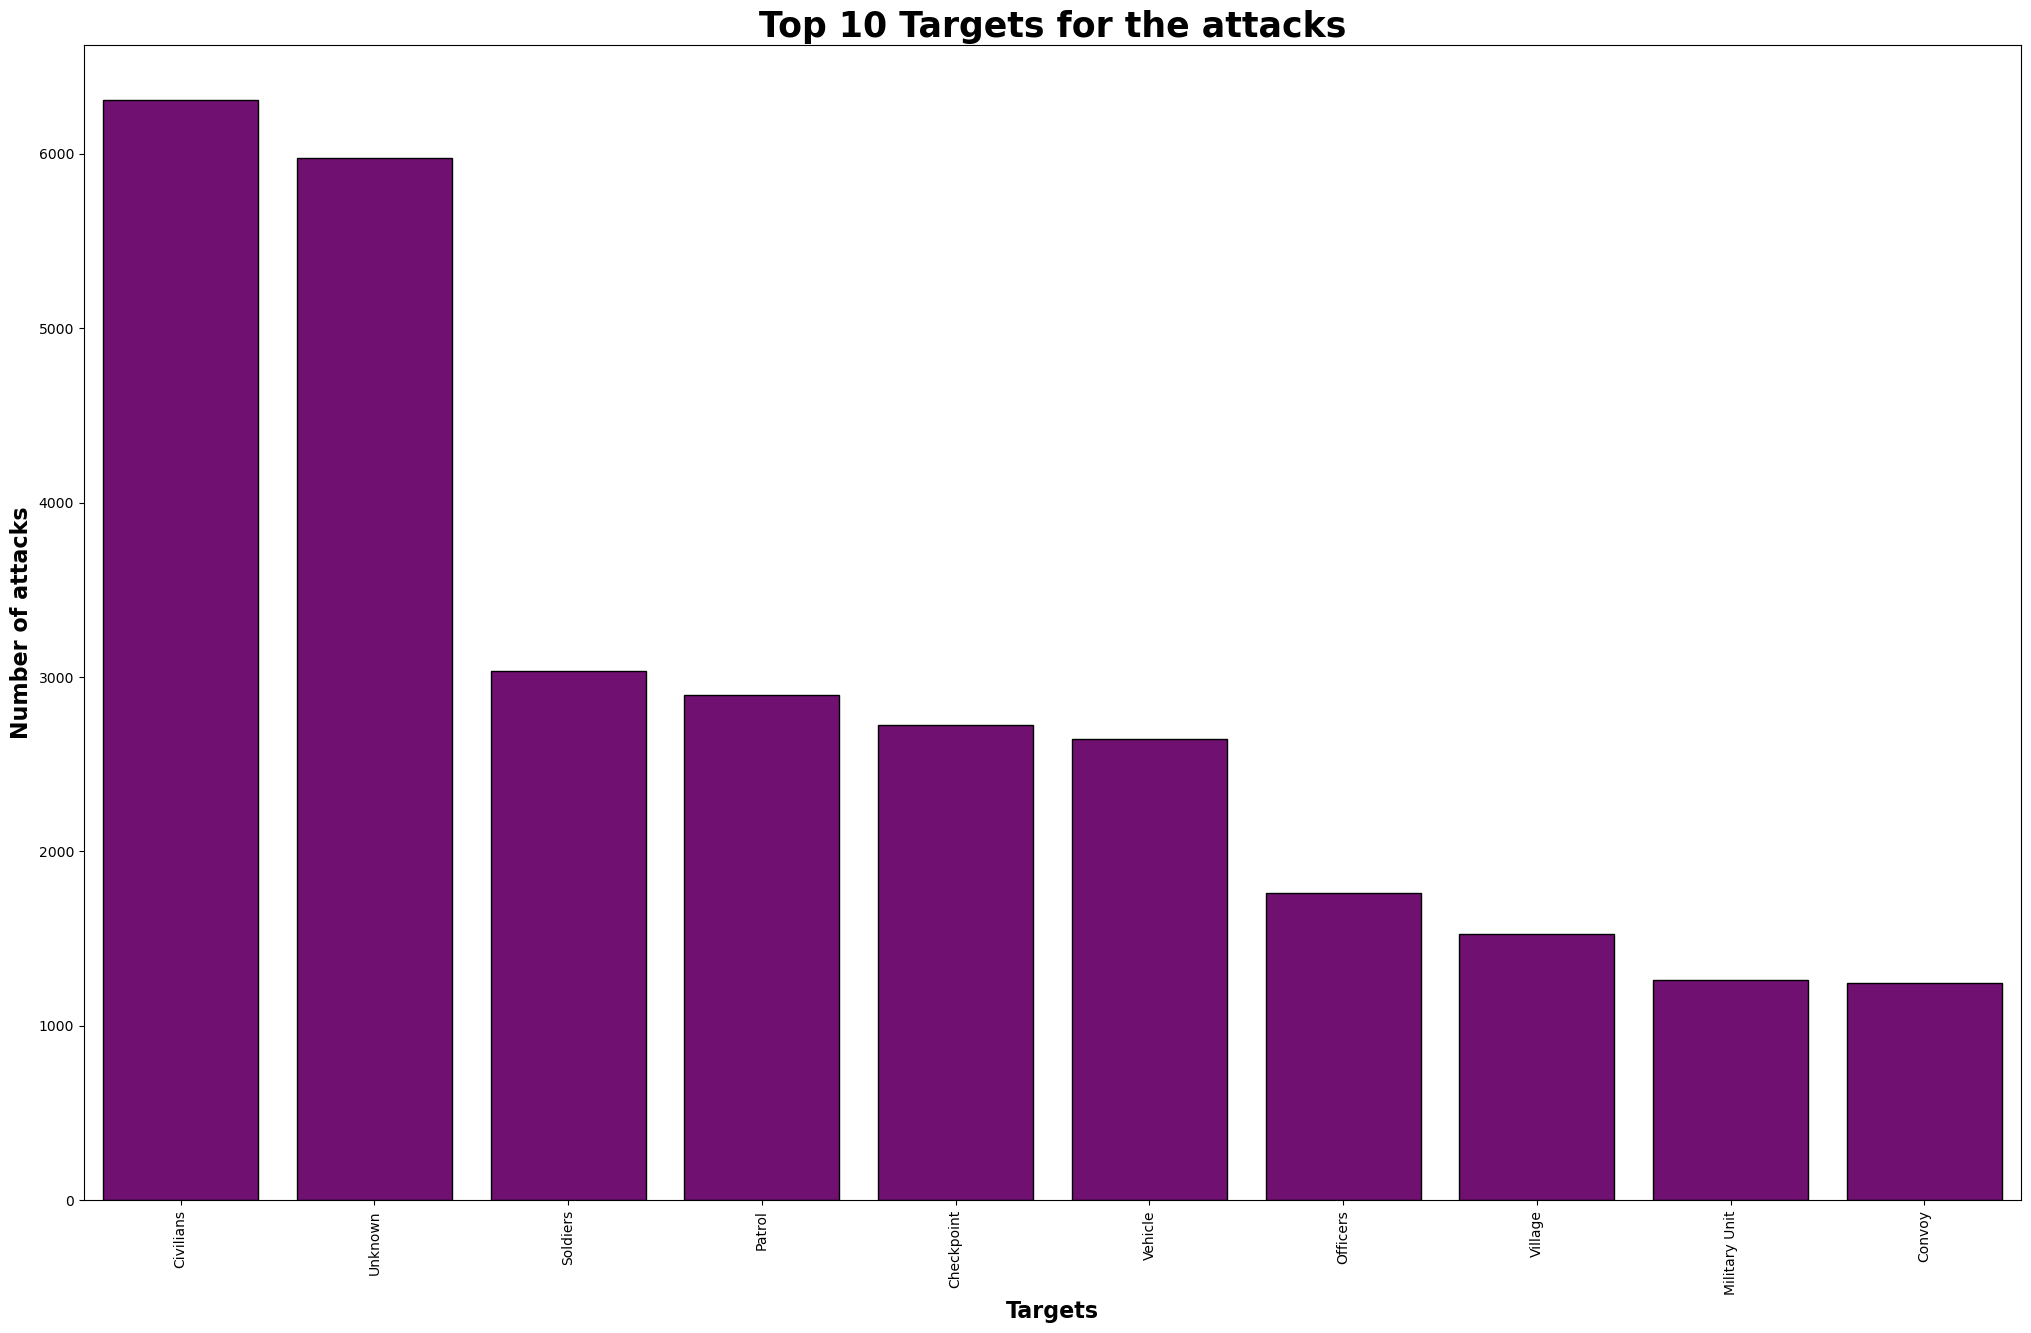

In [60]:
plt.figure(figsize=(25,15))
sns.countplot(df['target1'], order = df['target1'].value_counts()[:10].index, color ='purple', edgecolor = 'k')
plt.xlabel("Targets", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of attacks", fontweight = 'bold', fontsize =16)
plt.title("Top 10 Targets for the attacks", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**11.Unknown targets has the highest priority**

**===================================================================================================================**

# 12) Number of killed in each attack

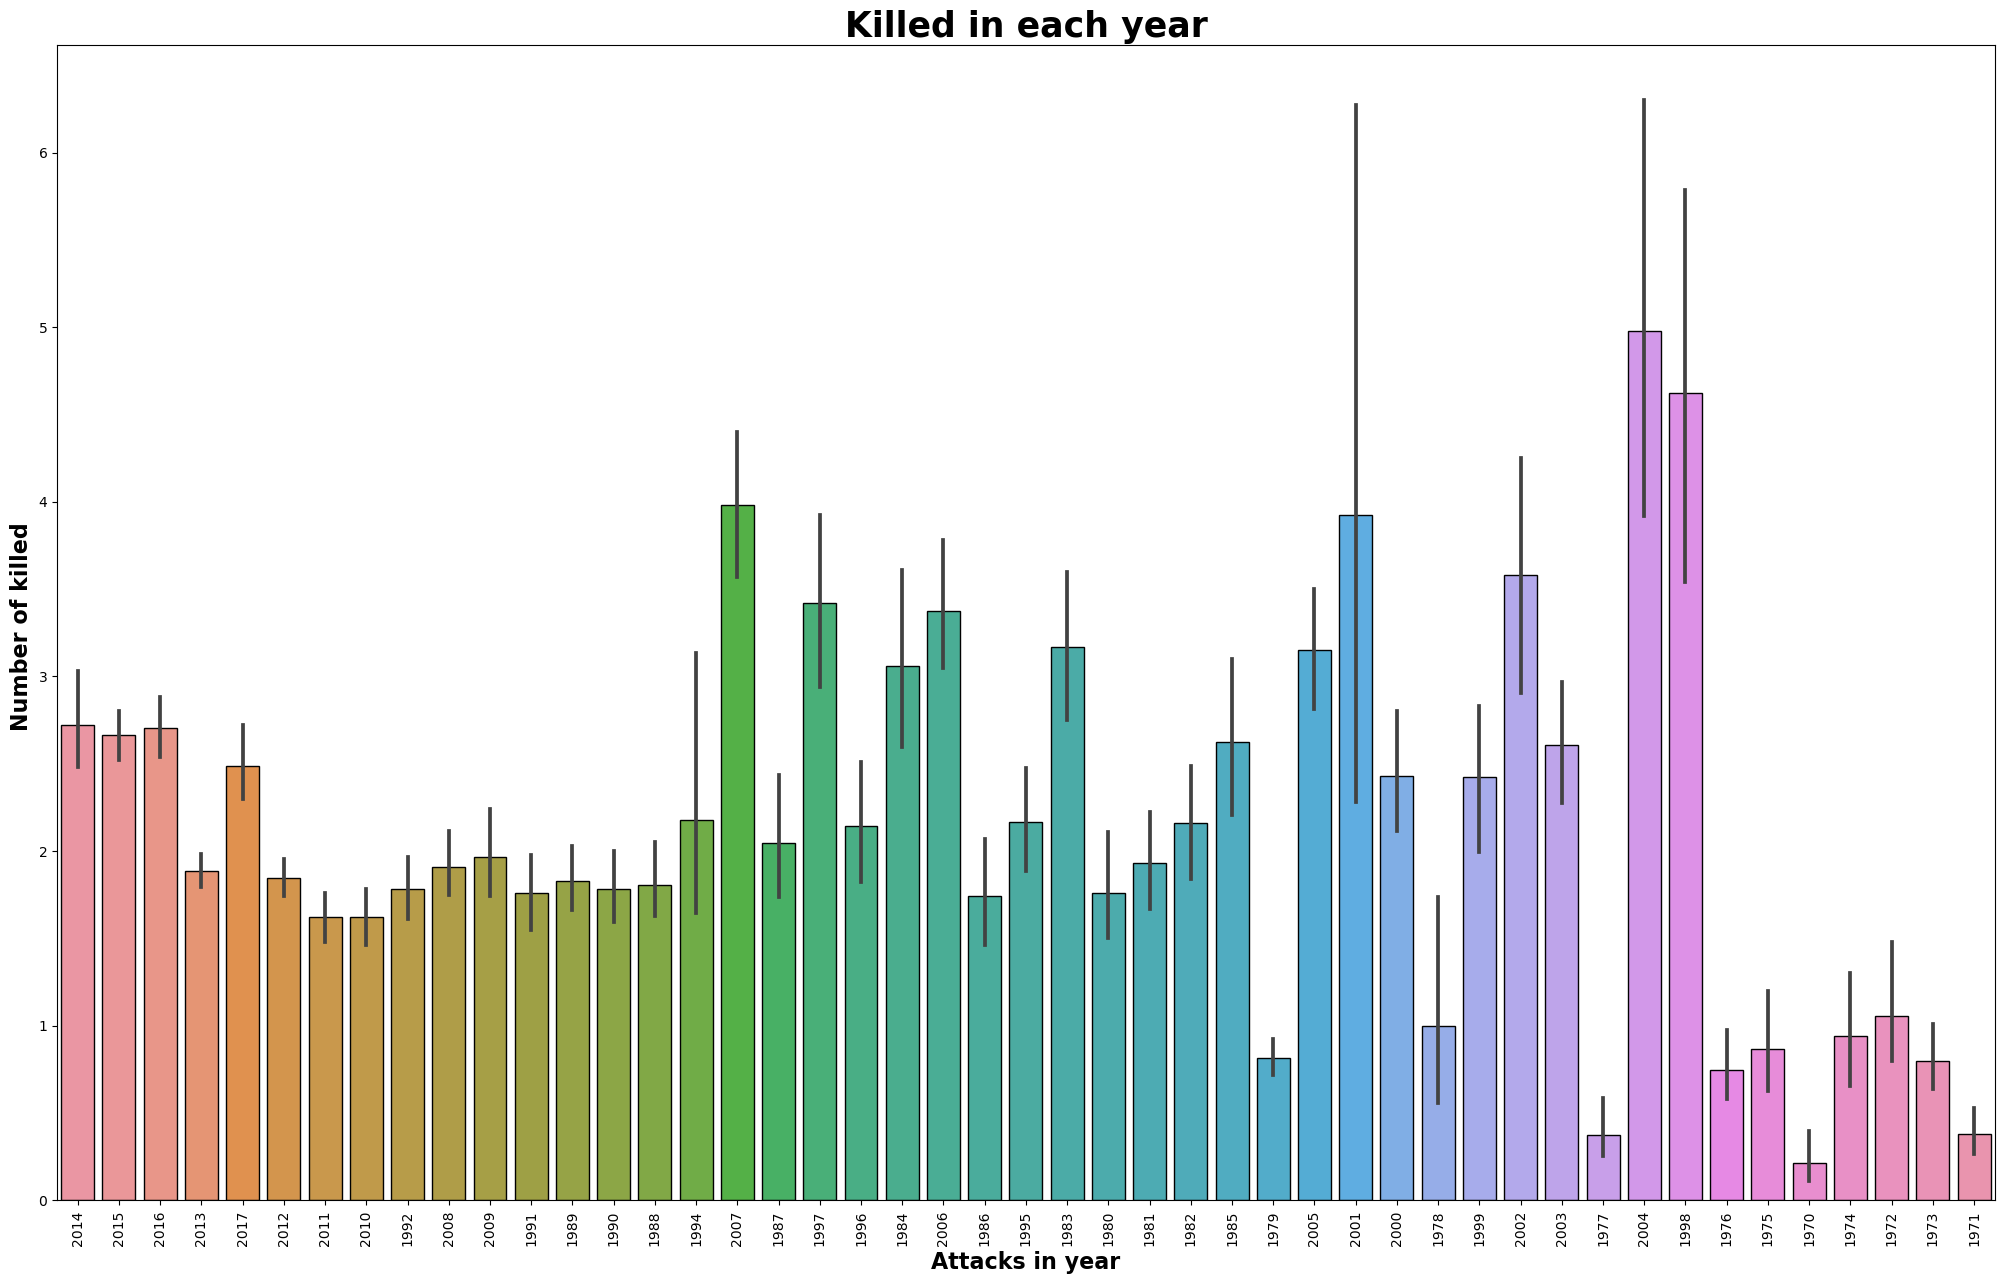

In [61]:
plt.figure(figsize=(25,15))
sns.barplot(x = df['iyear'], y= df['nkill'],order = df['iyear'].value_counts().index, data =df, edgecolor = 'k')
plt.xlabel("Attacks in year", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of killed ", fontweight = 'bold', fontsize =16)
plt.title("Killed in each year", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**12. Year 2004 has the highest number of killed**

**==========================================================================================================**

# 13) Number of wounded per each attack

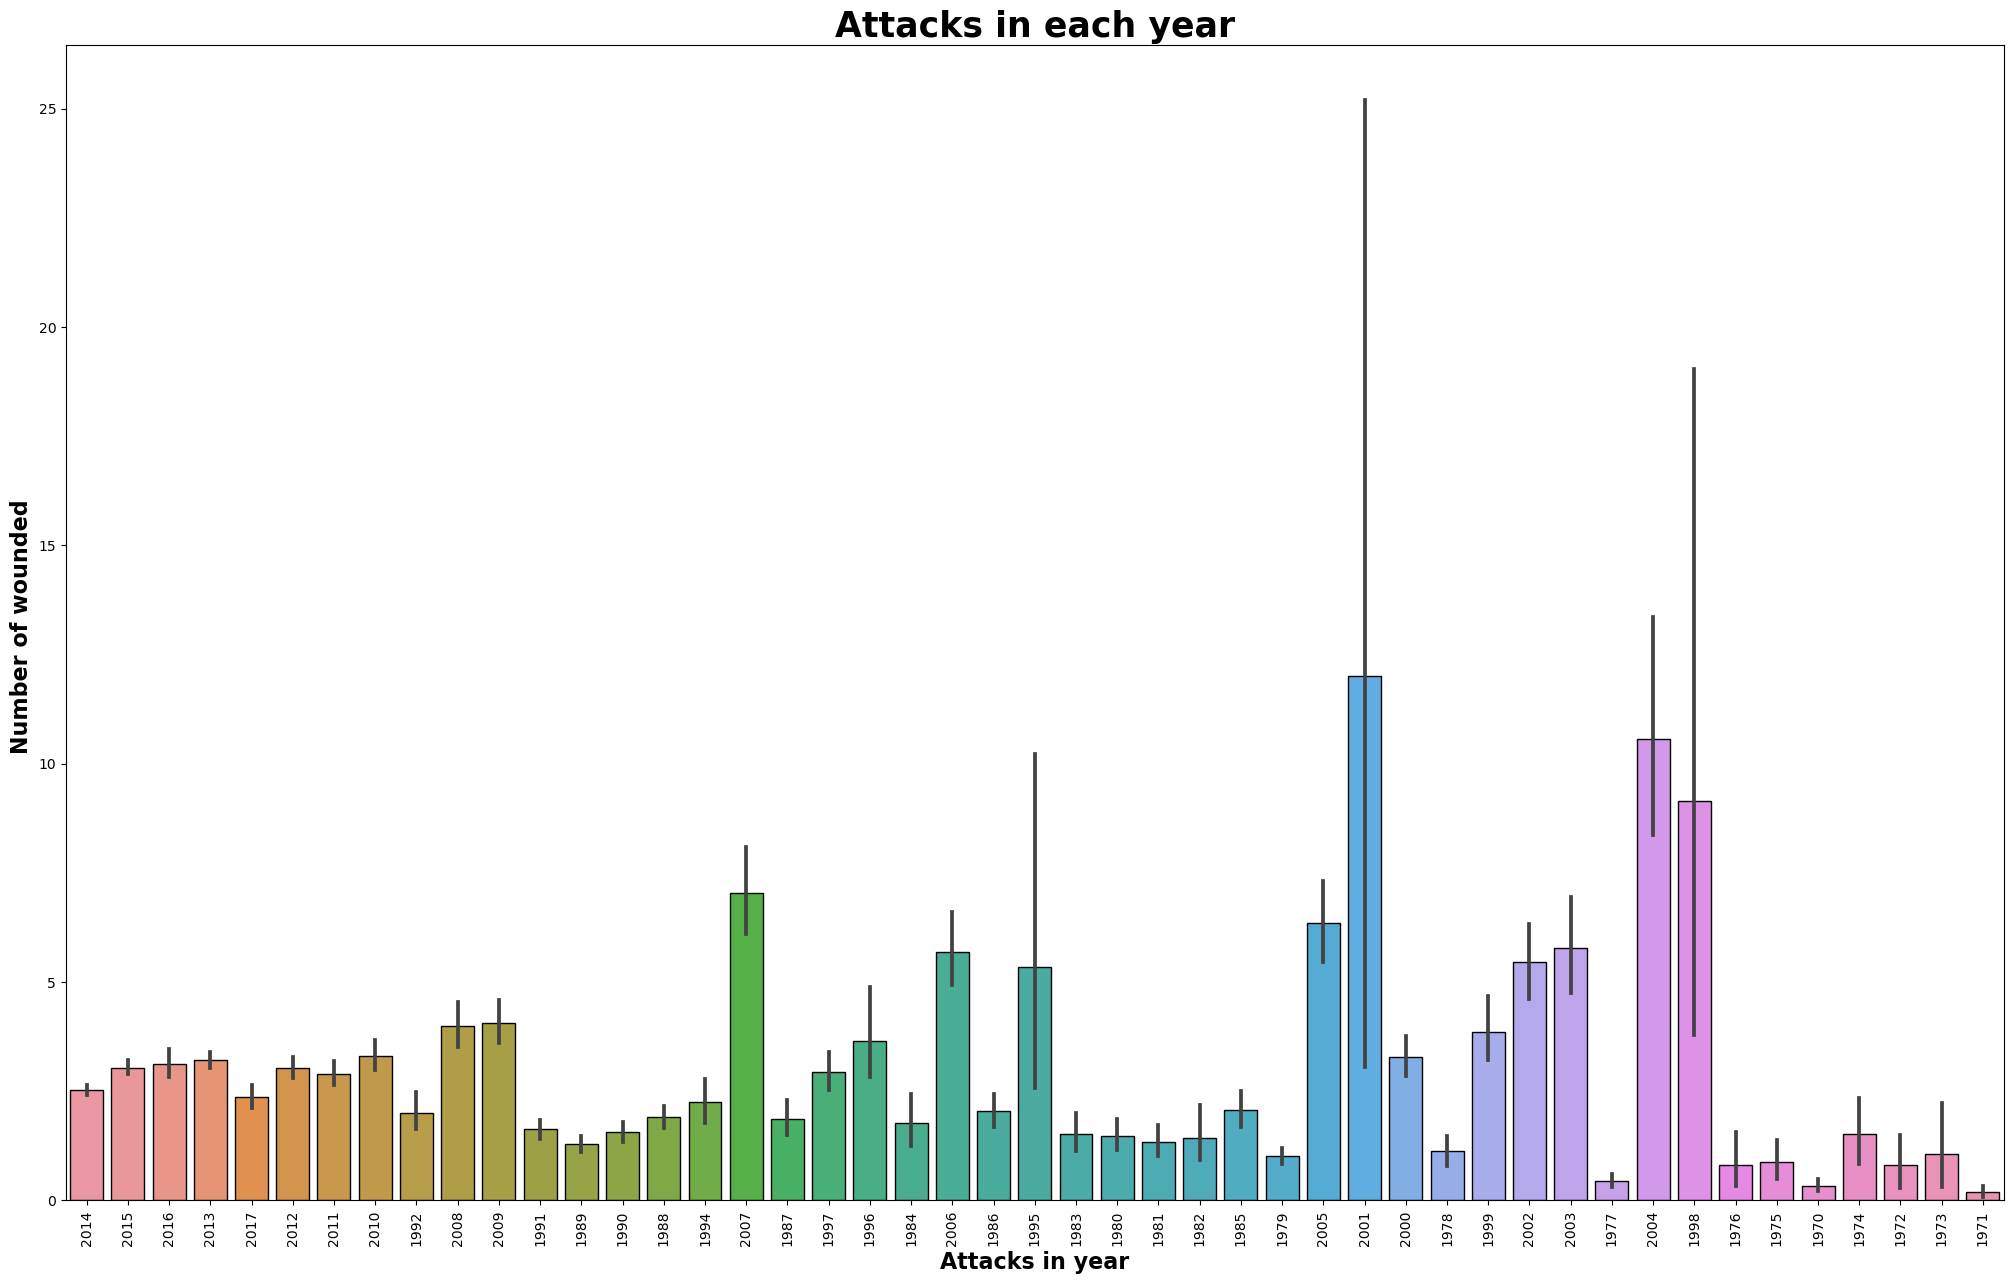

In [62]:
plt.figure(figsize=(25,15))
sns.barplot(x = df['iyear'],y=df['nwound'],order= df['iyear'].value_counts().index, data =df, edgecolor = 'k')
plt.xlabel("Attacks in year", fontweight = 'bold', fontsize = 16)
plt.ylabel("Number of wounded ", fontweight = 'bold', fontsize =16)
plt.title("Attacks in each year", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**13. The year 2001 has the highest number of wounded**

**==================================================================================================================**

# 14) Attacks in each country

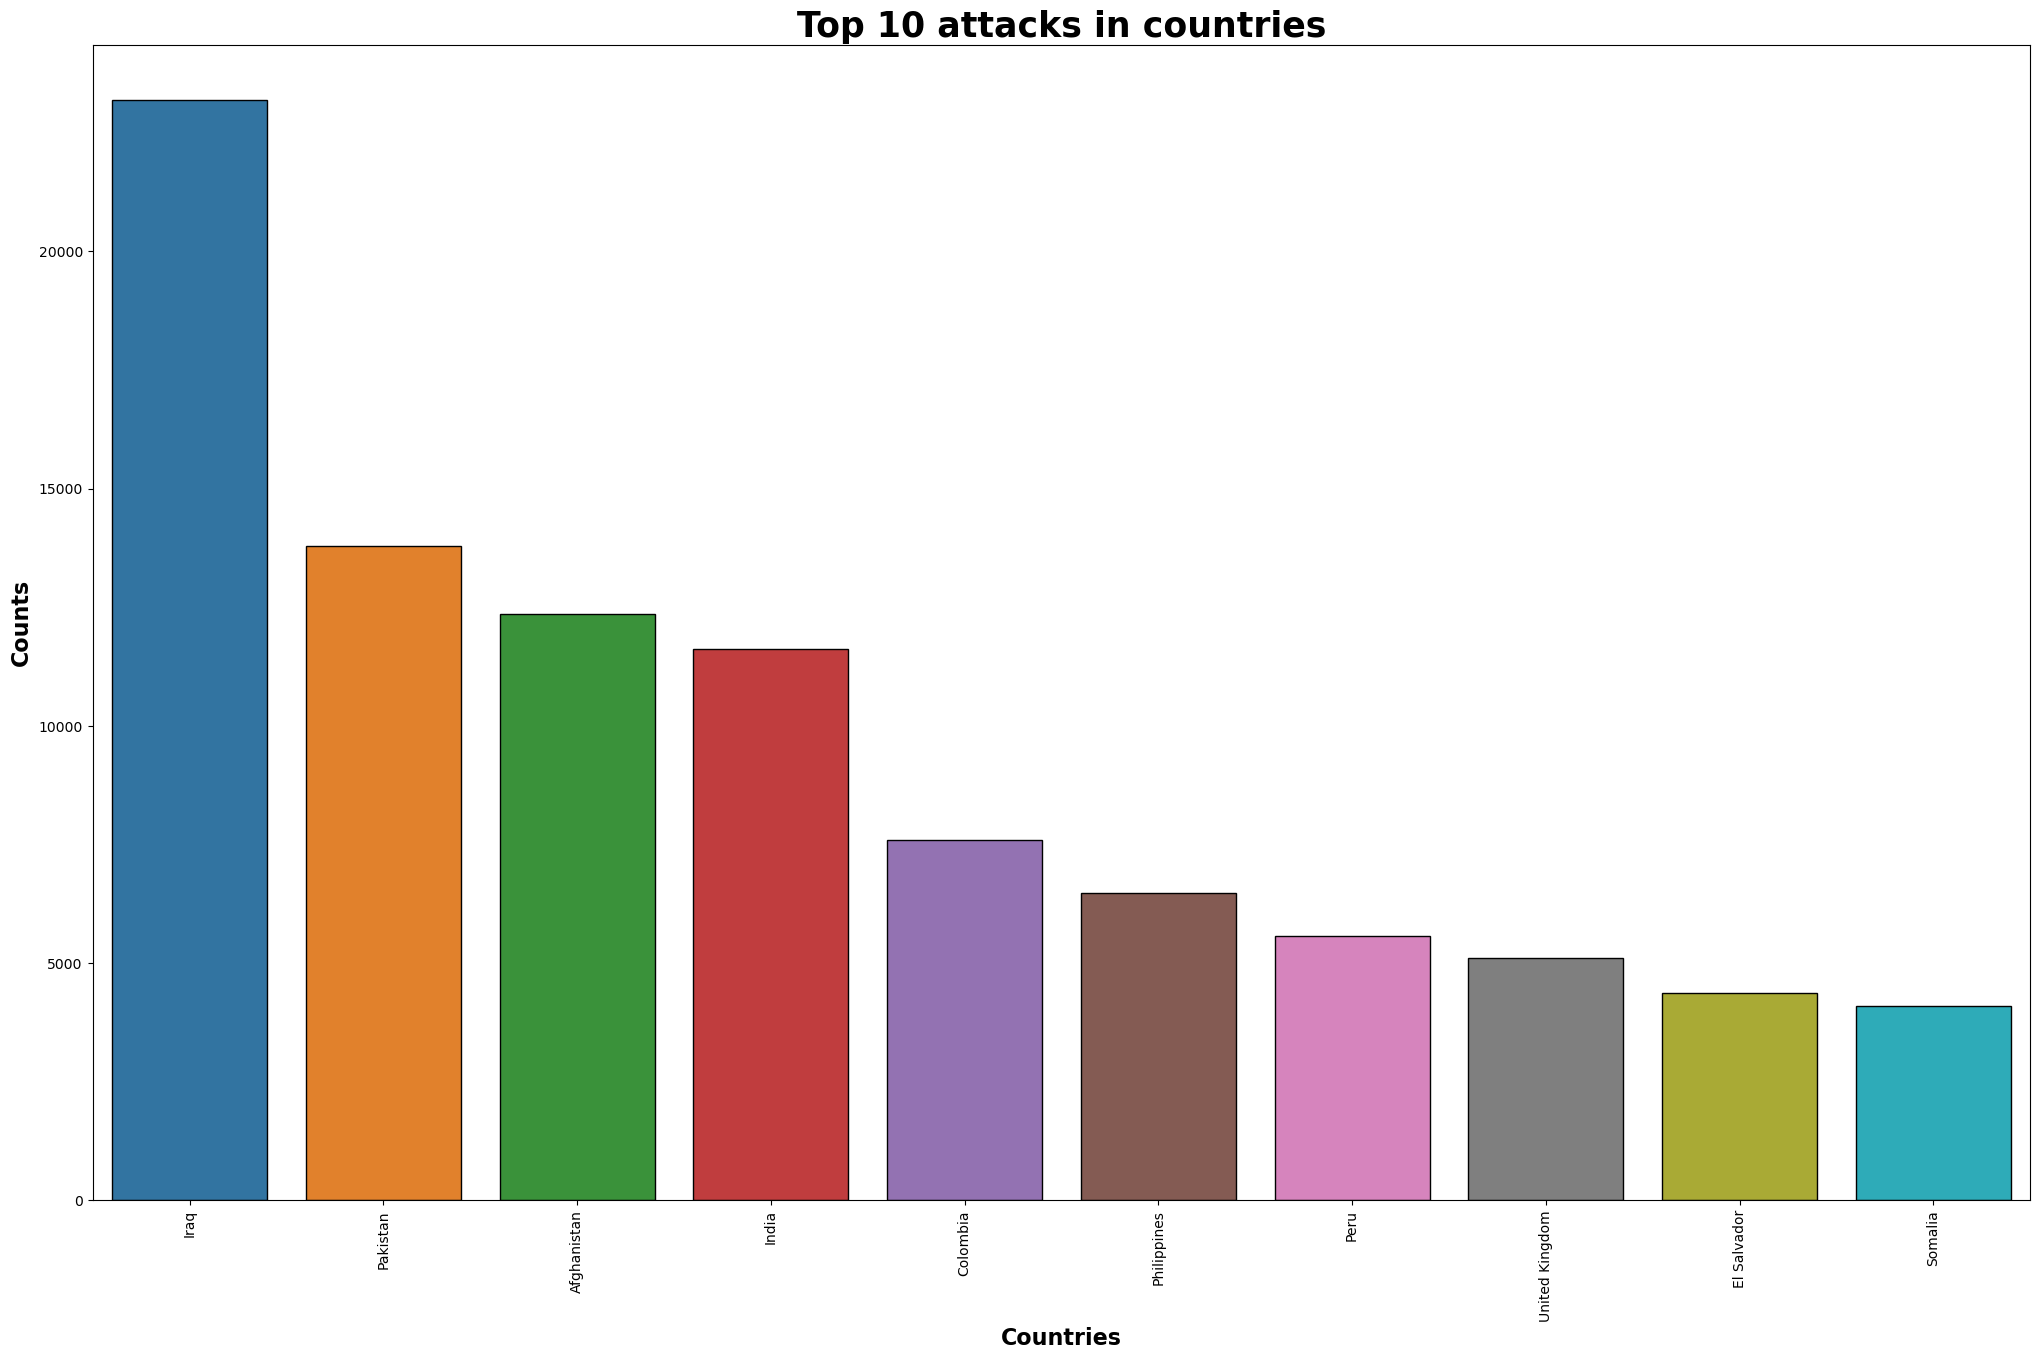

In [63]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['country_txt'], order = df['country_txt'].value_counts()[:10].index, data =df, edgecolor ='k')
plt.xlabel("Countries", fontweight = 'bold', fontsize = 16)
plt.ylabel("Counts", fontweight = 'bold', fontsize =16)
plt.title("Top 10 attacks in countries", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**14. The country Iraq has highest number of attacks**

**================================================================================================================**

# 15) Attacks in each city

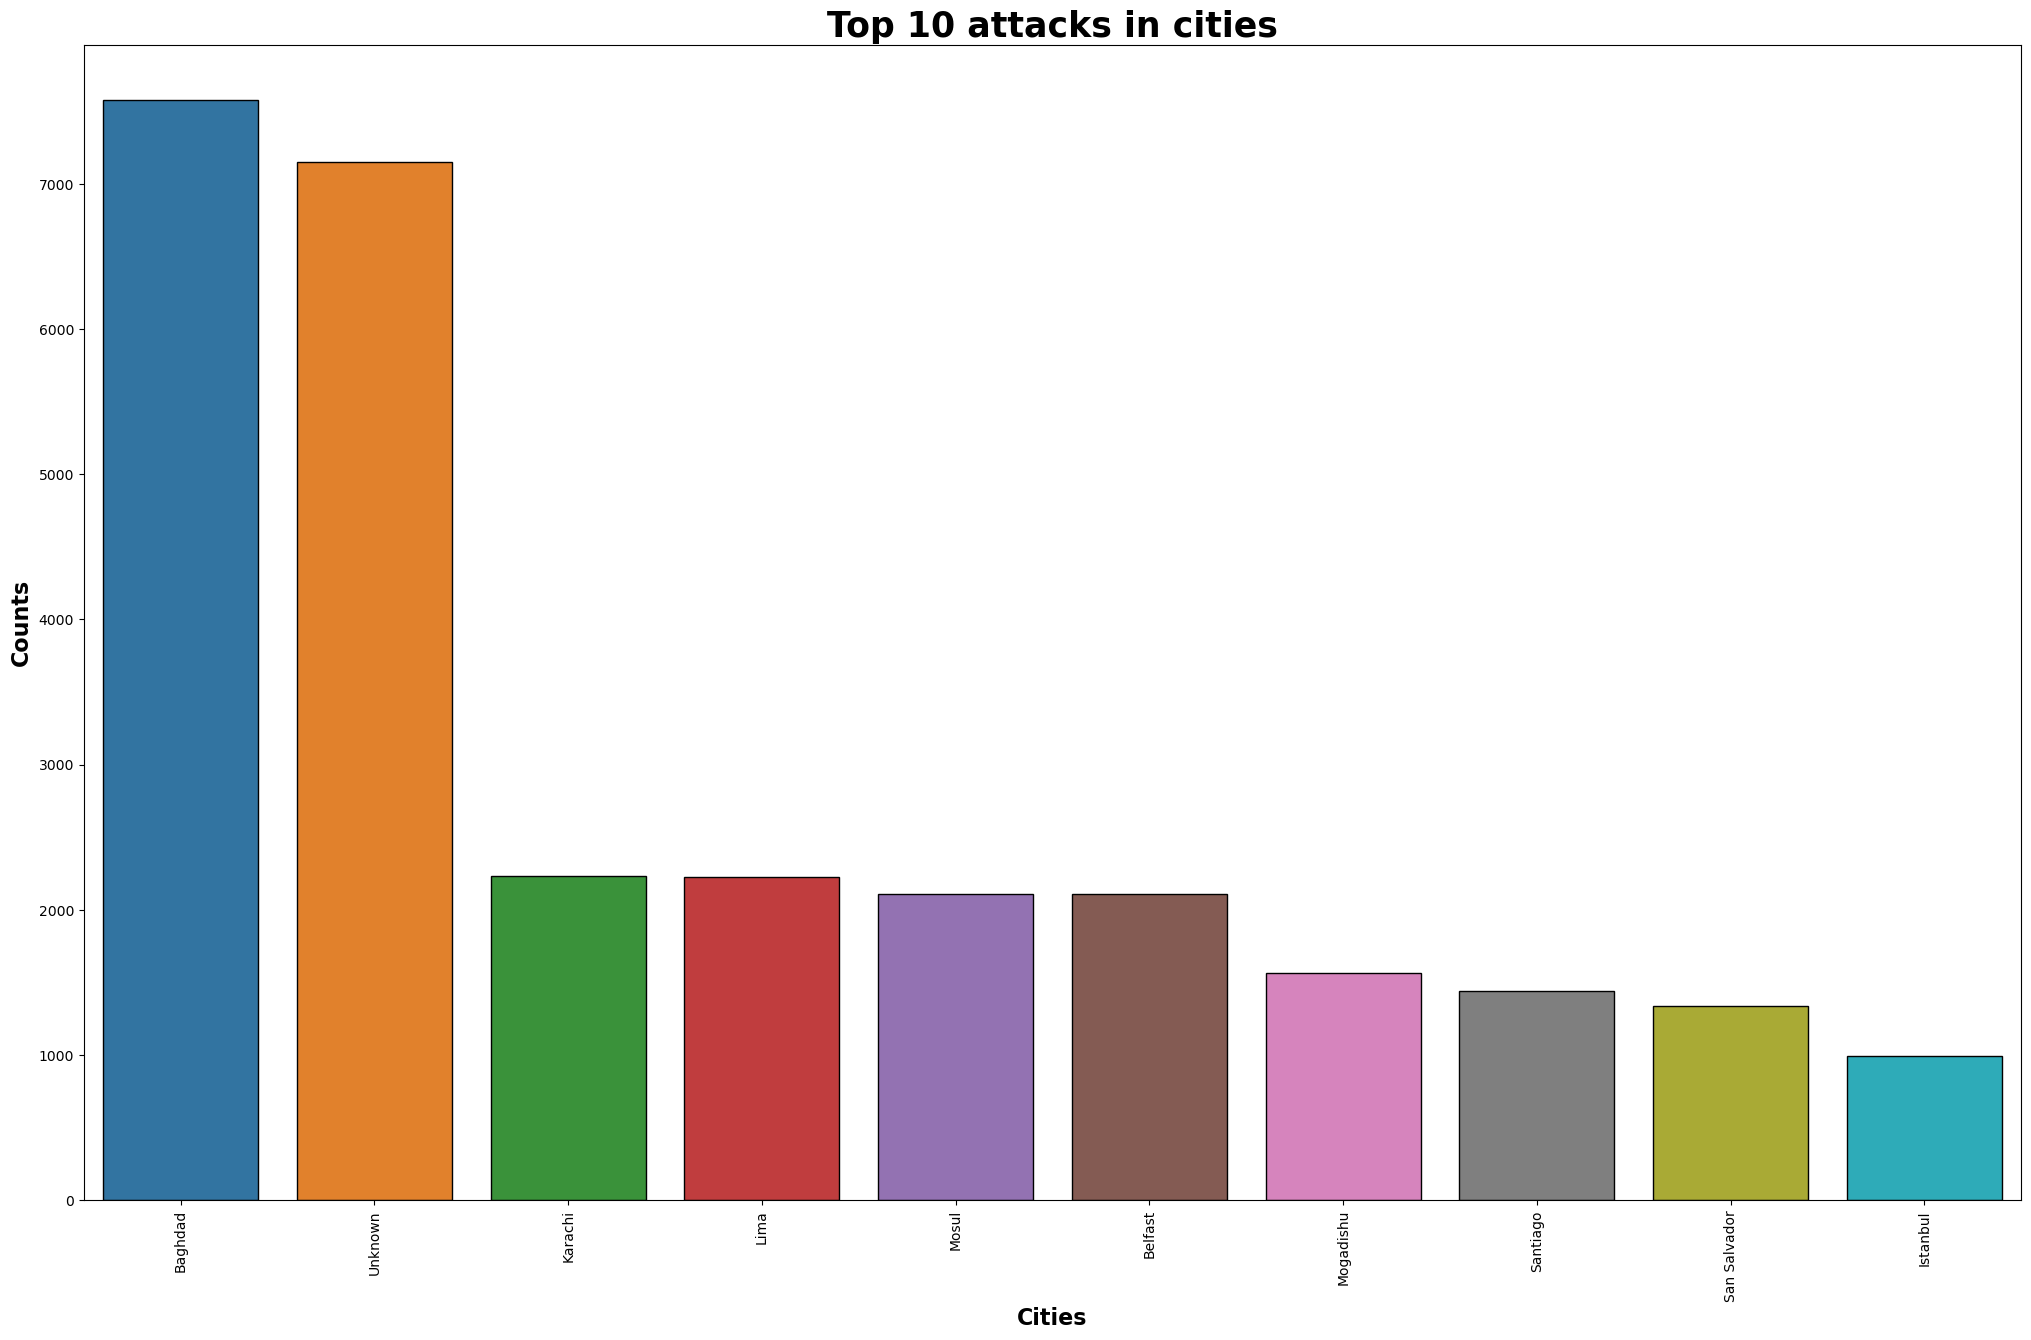

In [64]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['city'], order = df['city'].value_counts()[:10].index, data =df, edgecolor ='k')
plt.xlabel("Cities", fontweight = 'bold', fontsize = 16)
plt.ylabel("Counts", fontweight = 'bold', fontsize =16)
plt.title("Top 10 attacks in cities", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**15.The city Baghdad was affected by highest number of attacks** 

**================================================================================================================**

# Attacks in each states

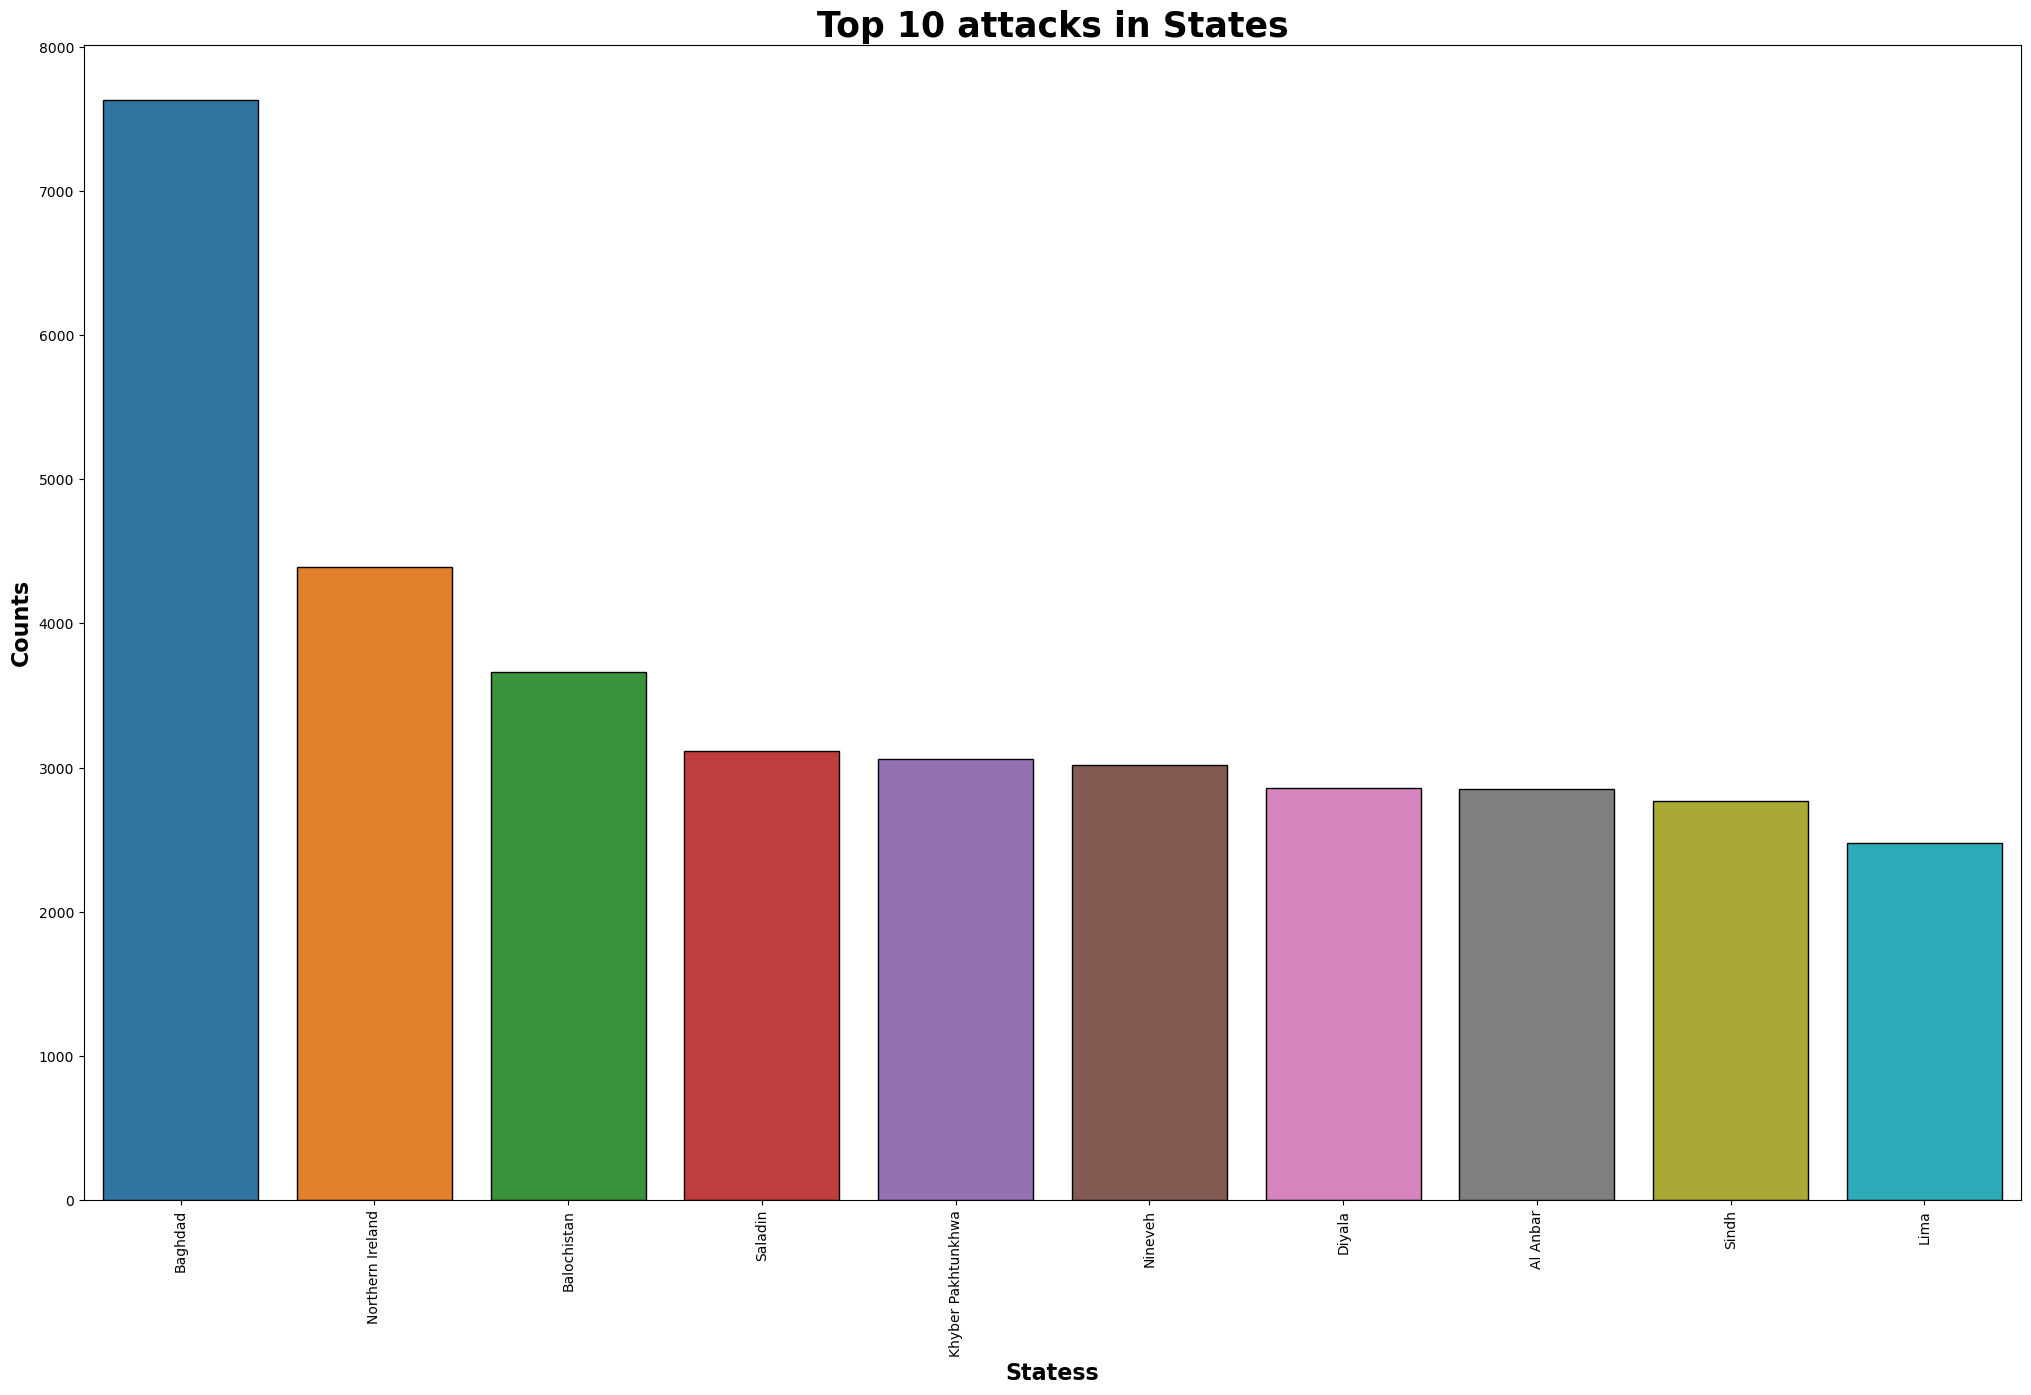

In [65]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['provstate'], order = df['provstate'].value_counts()[:10].index, data =df, edgecolor ='k')
plt.xlabel("Statess", fontweight = 'bold', fontsize = 16)
plt.ylabel("Counts", fontweight = 'bold', fontsize =16)
plt.title("Top 10 attacks in States", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**The state Baghdad was mostly affected by the terror activities**

**======================================================================================================================**

# 17) Terror activities in India

**17.1 Terror activities in Indian Cities**

In [108]:
df_India = df[df['country_txt'] == 'India']['city']
df_India.value_counts()[:10]

Srinagar     638
Unknown      528
Imphal       426
New Delhi    152
Amritsar     136
Sopore       102
Ludhiana      77
Guwahati      77
Anantnag      76
Jammu         57
Name: city, dtype: int64

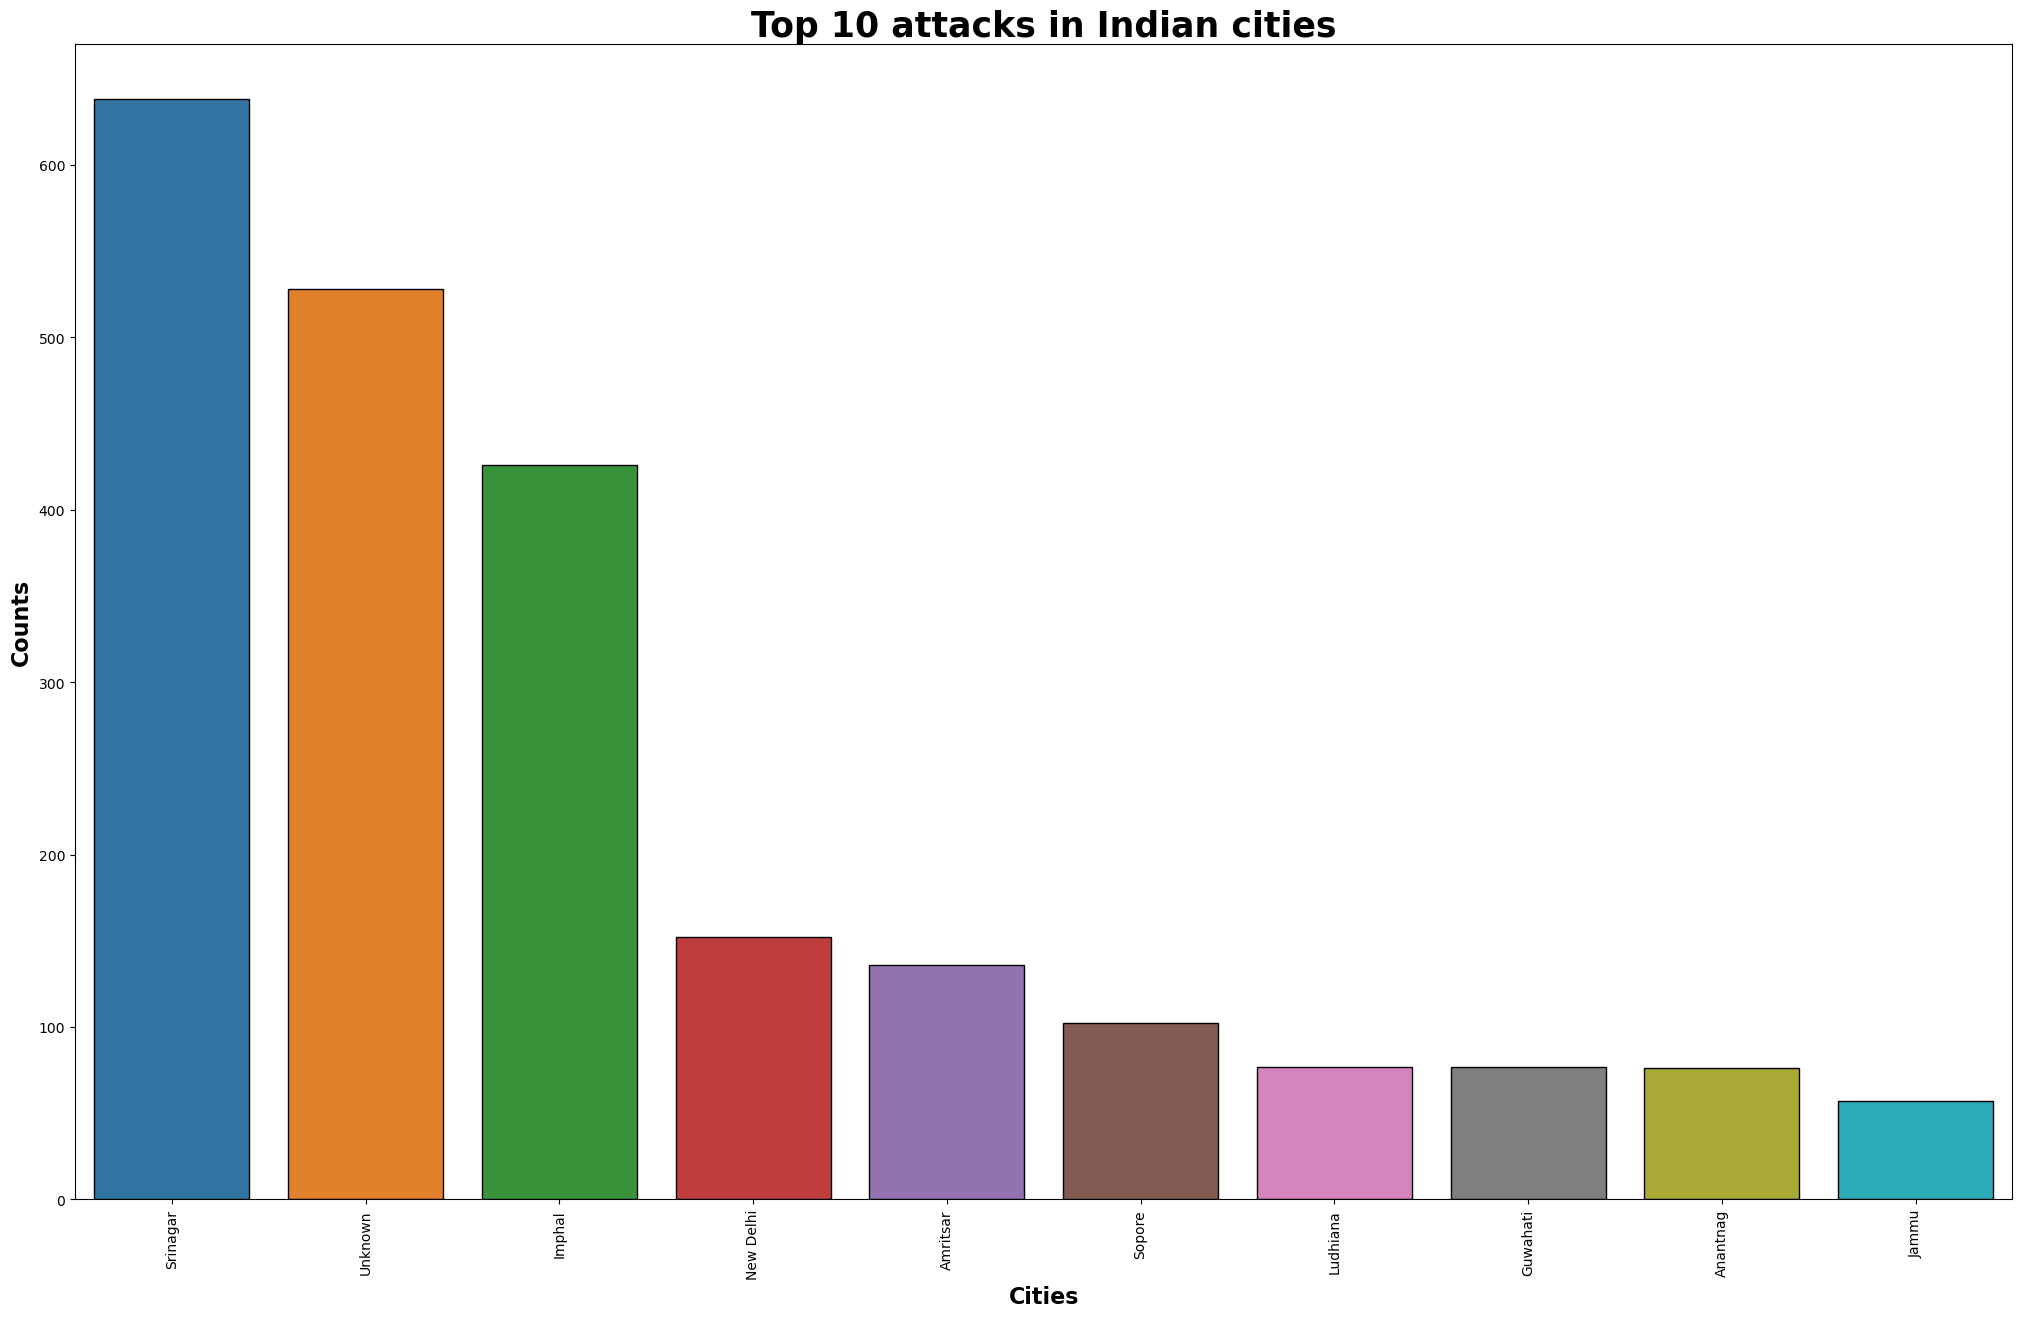

In [110]:
plt.figure(figsize=(25,15))
sns.countplot(x=df_India, order = df_India.value_counts()[:10].index, data =df, edgecolor ='k')
plt.xlabel("Cities", fontweight = 'bold', fontsize = 16)
plt.ylabel("Counts", fontweight = 'bold', fontsize =16)
plt.title("Top 10 attacks in Indian cities", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**17.1 The city Srinagar in India has affected mostly by the terror activities**

**.......................................................................................................**

**17.2 Terror activities in Indian States**

In [66]:
df_India = df[df['country_txt'] == 'India']['provstate']
df_India.value_counts()[:10]

Jammu and Kashmir    2427
Assam                1134
Manipur              1092
Chhattisgarh          972
Punjab                901
Jharkhand             874
Bihar                 679
West Bengal           645
Odisha                413
Maharashtra           302
Name: provstate, dtype: int64

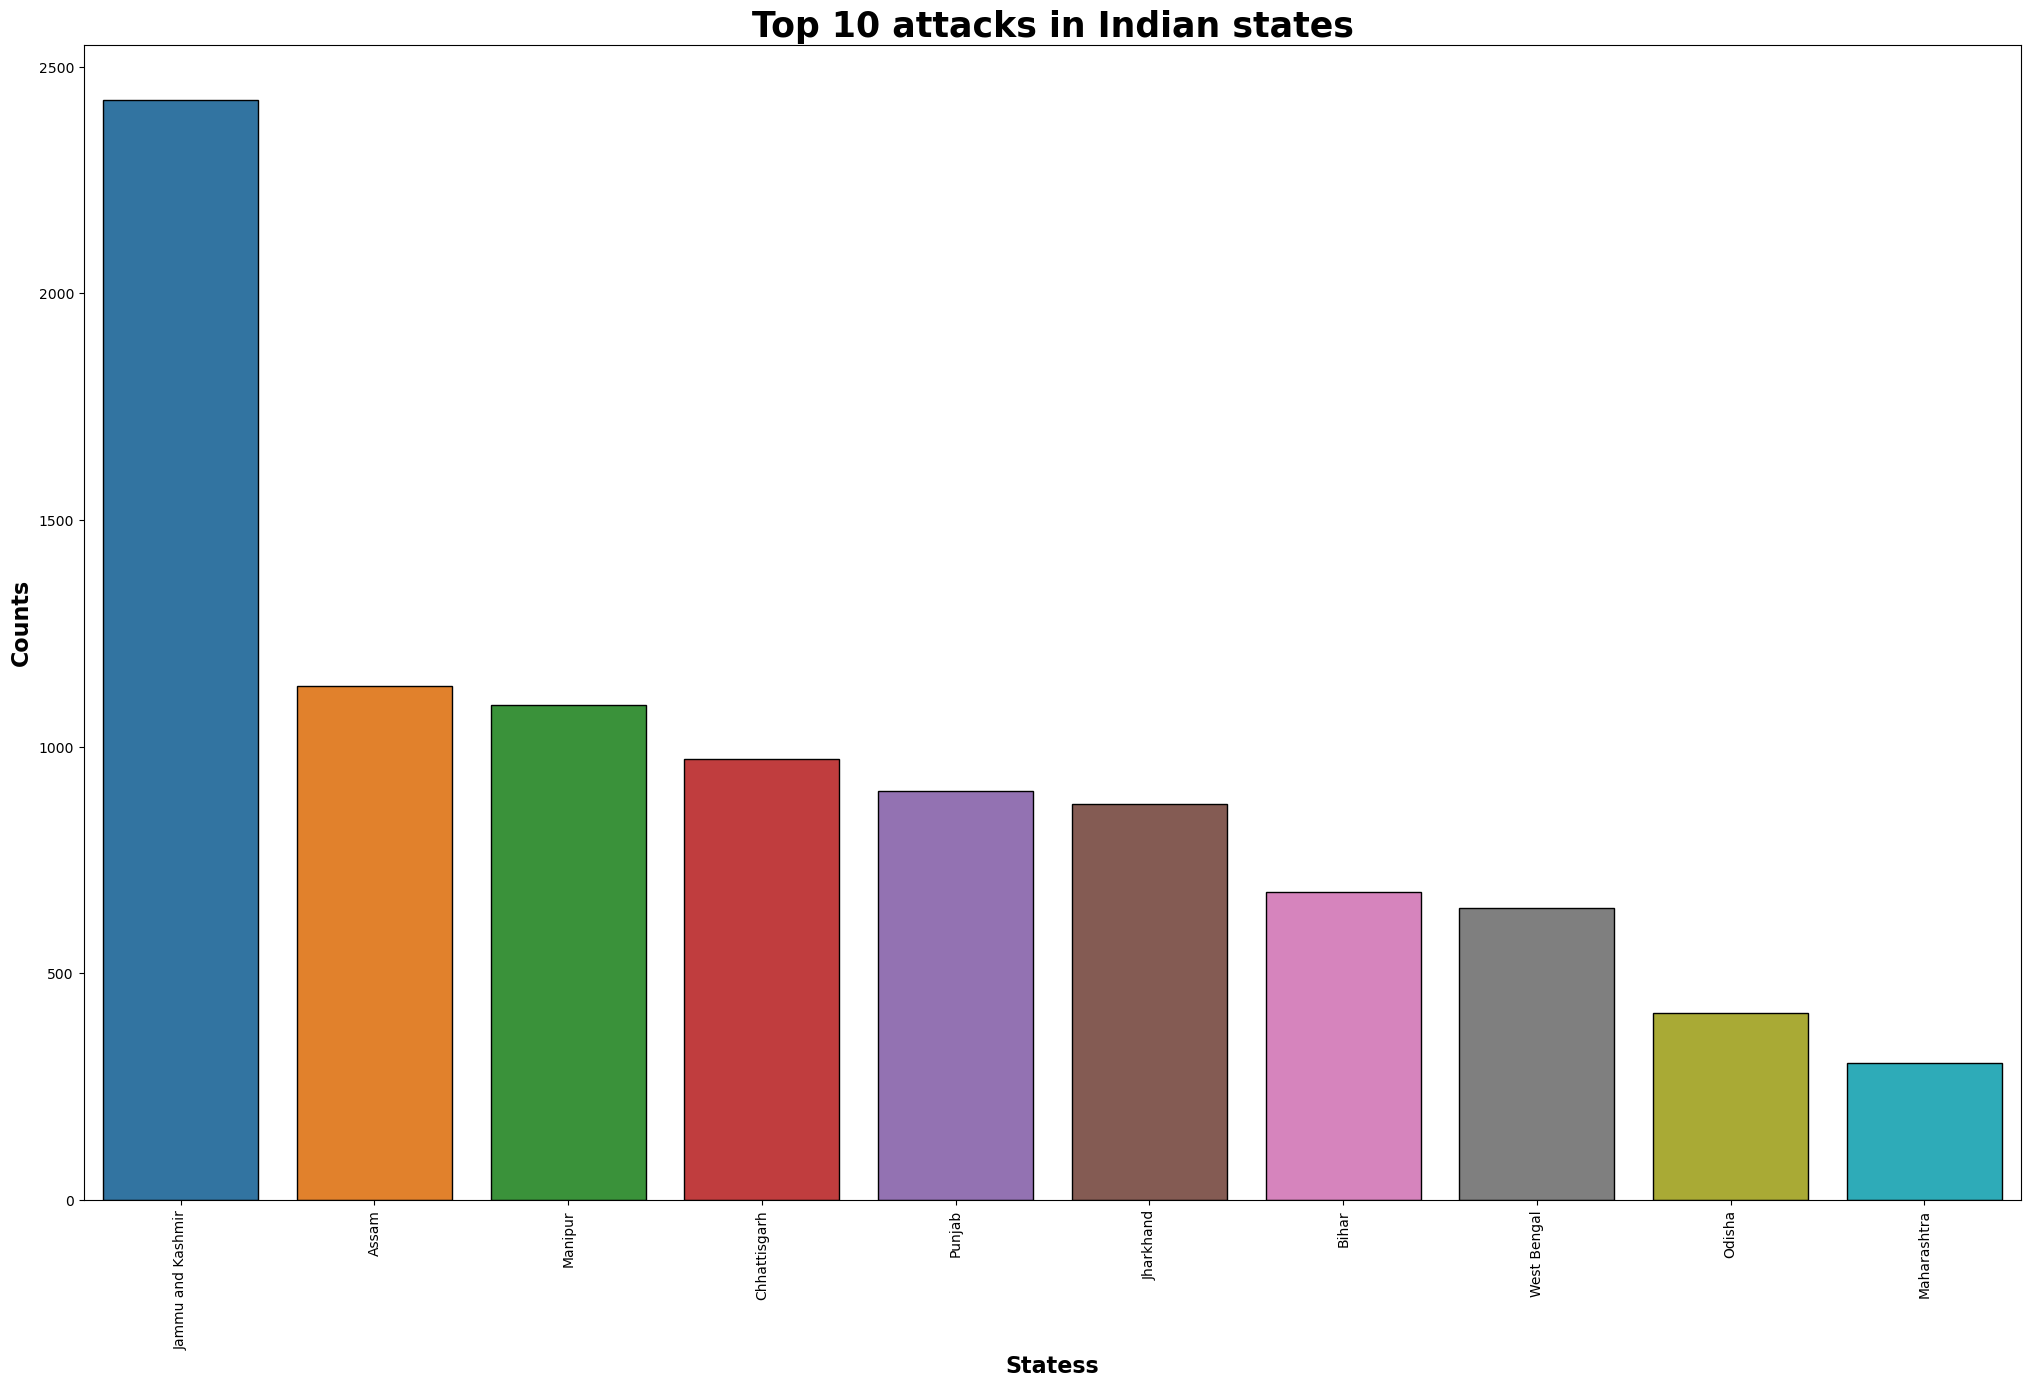

In [70]:
plt.figure(figsize=(25,15))
sns.countplot(x=df_India, order = df_India.value_counts()[:10].index,data =df, edgecolor ='k')
plt.xlabel("Statess", fontweight = 'bold', fontsize = 16)
plt.ylabel("Counts", fontweight = 'bold', fontsize =16)
plt.title("Top 10 attacks in Indian states", fontweight = 'bold', fontsize = 25)
plt.xticks(rotation=90)
plt.show()

**17.2 The Indian state Jammu and kashmir has affected mostly by the terror activities**

**=============================================================================================================**

#                                         THANKYOU

**=============================================================================================================**